336
168


/home/robertofelipe_sg/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


(0.5, 4.5)

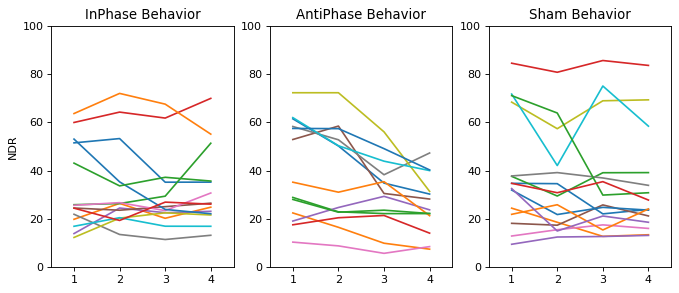

In [2]:
import numpy as np
import pandas as pd
import scipy
import mne
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm                                                                                                       
import statsmodels
# import pingouin as pg
import sklearn as sk
from sklearn.cluster import KMeans

df = pd.read_csv('Mixed_mod.txt', sep=r'\s', header=0, names = ['NDR', 'ZPAC', 'ORIENT', 'SUBJECT', 'GROUP', 'TIMEP'])
print(len(df))

orient = df.groupby(df['ORIENT']).groups
zero_index = orient[0].values
one_index = orient[1].values

df.drop(df.index[one_index], inplace= True)
df.drop(['ZPAC', 'ORIENT', 'SUBJECT'], axis= 1, inplace= True)
df = df.reset_index(drop=True)
print(len(df))

stim = df.groupby(df['GROUP']).groups
timep = df.groupby(df['TIMEP']).groups

G1_Bsl = stim[1].intersection(timep[0]).values
G1_ACS = stim[1].intersection(timep[5]).values
G1_P10 = stim[1].intersection(timep[10]).values
G1_P30 = stim[1].intersection(timep[30]).values
G2_Bsl = stim[2].intersection(timep[0]).values
G2_ACS = stim[2].intersection(timep[5]).values
G2_P10 = stim[2].intersection(timep[10]).values
G2_P30 = stim[2].intersection(timep[30]).values
G5_Bsl = stim[5].intersection(timep[0]).values
G5_ACS = stim[5].intersection(timep[5]).values
G5_P10 = stim[5].intersection(timep[10]).values
G5_P30 = stim[5].intersection(timep[30]).values


plt.figure(figsize=(10, 4), dpi= 80)
plt.subplot(1,3,1)
plt.plot([1,2,3,4],[df.loc[G1_Bsl]['NDR'],df.loc[G1_ACS]['NDR'],df.loc[G1_P10]['NDR'],df.loc[G1_P30]['NDR']])
plt.title('InPhase Behavior')
plt.ylabel('NDR')
plt.ylim(0,100)
plt.xlim(0.5,4.5)
plt.subplot(1,3,2)
plt.plot([1,2,3,4],[df.loc[G2_Bsl]['NDR'],df.loc[G2_ACS]['NDR'],df.loc[G2_P10]['NDR'],df.loc[G2_P30]['NDR']])
plt.title('AntiPhase Behavior')
plt.ylim(0,100)
plt.xlim(0.5,4.5)
plt.subplot(1,3,3)
plt.plot([1,2,3,4],[df.loc[G5_Bsl]['NDR'],df.loc[G5_ACS]['NDR'],df.loc[G5_P10]['NDR'],df.loc[G5_P30]['NDR']])
plt.title('Sham Behavior')
plt.ylim(0,100)
plt.xlim(0.5,4.5)



/home/robertofelipe_sg/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


(-10, 10)

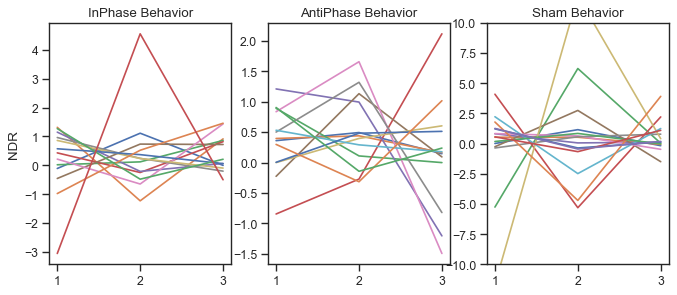

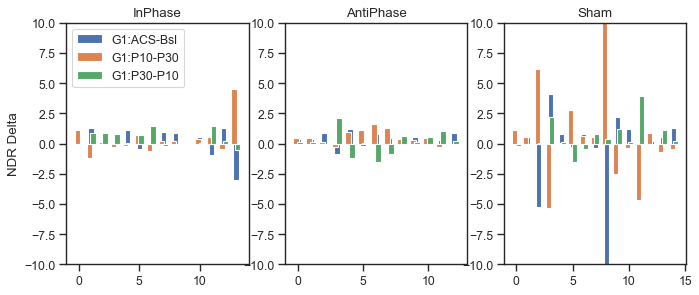

In [6]:
df_ml = pd.read_csv('Mixed_mod.txt', sep=r'\s', header=0, names = ['NDR', 'ZPAC', 'ORIENT', 'SUBJECT', 'GROUP', 'TIMEP'])
# print(len(df_ml))

orient = df_ml.groupby(df_ml['ORIENT']).groups
zero_index = orient[0].values
one_index = orient[1].values
df_ml.drop(df_ml.index[one_index], inplace= True)
df_ml.reset_index(drop=True)

timep = df_ml.groupby(df_ml['TIMEP']).groups
Bsl_index = timep[0].values
ACS_index = timep[5].values
P10_index = timep[10].values
P30_index = timep[30].values

stim = df_ml.groupby(df_ml['GROUP']).groups
G1_index = stim[1].values
G2_index = stim[2].values
G5_index = stim[5].values

df_ml.drop(['ORIENT', 'SUBJECT', 'ZPAC'], axis= 1, inplace= True)
# print(len(df_ml))
df_ml = df_ml.dropna()
# print(df_ml)

G1_ACS_Bsl = (df.loc[G1_ACS]['NDR'] - df.loc[G1_Bsl]['NDR'].values).reset_index(drop=True)
G1_P10_ACS = (df.loc[G1_P10]['NDR'] - df.loc[G1_ACS]['NDR'].values).reset_index(drop=True)
G1_P30_P10 = (df.loc[G1_P30]['NDR'] - df.loc[G1_P10]['NDR'].values).reset_index(drop=True)
G2_ACS_Bsl = (df.loc[G2_ACS]['NDR'] - df.loc[G2_Bsl]['NDR'].values).reset_index(drop=True)
G2_P10_ACS = (df.loc[G2_P10]['NDR'] - df.loc[G2_ACS]['NDR'].values).reset_index(drop=True)
G2_P30_P10 = (df.loc[G2_P30]['NDR'] - df.loc[G2_P10]['NDR'].values).reset_index(drop=True) 
G5_ACS_Bsl = (df.loc[G5_ACS]['NDR'] - df.loc[G5_Bsl]['NDR'].values).reset_index(drop=True)
G5_P10_ACS = (df.loc[G5_P10]['NDR'] - df.loc[G5_ACS]['NDR'].values).reset_index(drop=True)
G5_P30_P10 = (df.loc[G5_P30]['NDR'] - df.loc[G5_P10]['NDR'].values).reset_index(drop=True) 
#print(G1_ACS_Bsl.values)

G1_soma = G1_ACS_Bsl.values + G1_P10_ACS.values + G1_P30_P10.values 
G2_soma = G2_ACS_Bsl.values + G2_P10_ACS.values + G2_P30_P10.values 
G5_soma = G5_ACS_Bsl.values + G5_P10_ACS.values + G5_P30_P10.values
#print(G1_soma)

G1_ACS_Bsl_n = G1_ACS_Bsl / G1_soma
G1_P10_ACS_n = G1_P10_ACS / G1_soma
G1_P30_P10_n = G1_P30_P10 / G1_soma
G2_ACS_Bsl_n = G2_ACS_Bsl / G2_soma
G2_P10_ACS_n = G2_P10_ACS / G2_soma
G2_P30_P10_n = G2_P30_P10 / G2_soma
G5_ACS_Bsl_n = G5_ACS_Bsl / G5_soma
G5_P10_ACS_n = G5_P10_ACS / G5_soma
G5_P30_P10_n = G5_P30_P10 / G5_soma
#print(G1_ACS_Bsl_n)

plt.figure(figsize=(10, 4), dpi= 80)
plt.subplot(1,3,1)
plt.plot([1,2,3],[G1_ACS_Bsl_n,G1_P10_ACS_n,G1_P30_P10_n])
plt.title('InPhase Behavior')
plt.ylabel('NDR')
#plt.ylim(-10,10)
# plt.xlim(0.5,2.5)
plt.subplot(1,3,2)
plt.plot([1,2,3],[G2_ACS_Bsl_n,G2_P10_ACS_n,G2_P30_P10_n])
plt.title('AntiPhase Behavior')
#plt.ylim(-10,10)
# plt.xlim(0.5,2.5)
plt.subplot(1,3,3)
plt.plot([1,2,3],[G5_ACS_Bsl_n,G5_P10_ACS_n,G5_P30_P10_n])
plt.title('Sham Behavior')
plt.ylim(-10,10)
# plt.xlim(0.5,2.5)

x1 = np.arange(14)
x2 = np.arange(13)
x5 = np.arange(15)
width = 0.45  # the width of the bars

plt.figure(figsize=(10, 4), dpi= 80)
plt.subplot(1,3,1)
rects1 = plt.bar(x1, G1_ACS_Bsl_n.values, width, label='G1:ACS-Bsl')
rects2 = plt.bar(x1 - width/3, G1_P10_ACS_n.values, width, label='G1:P10-P30')
rects3 = plt.bar(x1 + width/3, G1_P30_P10_n.values, width, label='G1:P30-P10')
plt.ylabel('NDR Delta')
plt.title('InPhase')
plt.ylim(-10,10)
plt.legend()
plt.subplot(1,3,2)
rects4 = plt.bar(x2, G2_ACS_Bsl_n.values, width, label='G2:ACS-Bsl')
rects5 = plt.bar(x2 - width/3, G2_P10_ACS_n.values, width, label='G2:P10-P30')
rects6 = plt.bar(x2 + width/3, G2_P30_P10_n.values, width, label='G2:P30-P10')
plt.title('AntiPhase')
plt.ylim(-10,10)
plt.subplot(1,3,3)
rects7 = plt.bar(x5, G5_ACS_Bsl_n.values, width, label='G5:ACS-Bsl')
rects8 = plt.bar(x5 - width/3, G5_P10_ACS_n.values, width, label='G5:P10-P30')
rects9 = plt.bar(x5 + width/3, G5_P30_P10_n.values, width, label='G5:P30-P10')
plt.title('Sham')
plt.ylim(-10,10)




336
168
17.104578797063244
(array([7]),) (array([7, 9]),) (array([7, 9]),)
(array([1, 6]),) (array([1, 6]),) (array([1, 3, 6]),)
(array([ 4,  6, 14]),) (array([ 1,  4, 11]),) (array([1, 4, 6]),)


/home/robertofelipe_sg/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


(0.5, 4.5)

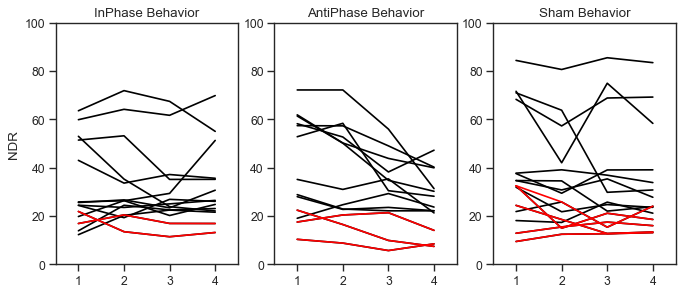

In [7]:
### Raw NDR Segmentation vs. Mean-STD All subjects Baseline
df_lea = pd.read_csv('Mixed_mod.txt', sep=r'\s', header=0, names = ['NDR', 'ZPAC', 'ORIENT', 'SUBJECT', 'GROUP', 'TIMEP'])
print(len(df_lea))

orient = df_lea.groupby(df_lea['ORIENT']).groups
zero_index = orient[0].values
one_index = orient[1].values
df_lea.drop(df_lea.index[one_index], inplace= True)
df_lea.drop(['ORIENT'], axis= 1, inplace= True)
df_lea = df_lea.reset_index(drop=True)
print(len(df_lea))

All_Bsl = df_lea.loc[Bsl_index]['NDR']
#print(All_Bsl)
thr =  np.mean(All_Bsl.values)- np.std(All_Bsl.values) 
print(thr)

G1_ACS_over = np.where(df_lea.loc[G1_ACS]['NDR'].values<=thr)
G1_P10_over = np.where(df_lea.loc[G1_P10]['NDR'].values<=thr)
G1_P30_over = np.where(df_lea.loc[G1_P30]['NDR'].values<=thr)
G2_ACS_over = np.where(df_lea.loc[G2_ACS]['NDR'].values<=thr)
G2_P10_over = np.where(df_lea.loc[G2_P10]['NDR'].values<=thr)
G2_P30_over = np.where(df_lea.loc[G2_P30]['NDR'].values<=thr)
G5_ACS_over = np.where(df_lea.loc[G5_ACS]['NDR'].values<=thr)
G5_P10_over = np.where(df_lea.loc[G5_P10]['NDR'].values<=thr)
G5_P30_over = np.where(df_lea.loc[G5_P30]['NDR'].values<=thr)
print(G1_ACS_over, G1_P10_over, G1_P30_over)
print(G2_ACS_over, G2_P10_over, G2_P30_over)
print(G5_ACS_over, G5_P10_over, G5_P30_over)

plt.figure(figsize=(10, 4), dpi= 80)
plt.subplot(1,3,1)
plt.plot([1,2,3,4],[df_lea.loc[G1_Bsl]['NDR'],df_lea.loc[G1_ACS]['NDR'],df_lea.loc[G1_P10]['NDR'],df_lea.loc[G1_P30]['NDR']], c='black')
plt.plot([1,2,3,4],[df_lea.loc[G1_Bsl]['NDR'][7],df_lea.loc[G1_ACS]['NDR'][42+7],df_lea.loc[G1_P10]['NDR'][84+7],df_lea.loc[G1_P30]['NDR'][126+7]], c='red')
plt.plot([1,2,3,4],[df_lea.loc[G1_Bsl]['NDR'][9],df_lea.loc[G1_ACS]['NDR'][42+9],df_lea.loc[G1_P10]['NDR'][84+9],df_lea.loc[G1_P30]['NDR'][126+9]], c='red')
plt.title('InPhase Behavior')
plt.ylabel('NDR')
plt.ylim(0,100)
plt.xlim(0.5,4.5)
plt.subplot(1,3,2)
plt.plot([1,2,3,4],[df.loc[G2_Bsl]['NDR'],df.loc[G2_ACS]['NDR'],df.loc[G2_P10]['NDR'],df.loc[G2_P30]['NDR']], c='black')
plt.plot([1,2,3,4],[df_lea.loc[G2_Bsl]['NDR'][14+1],df_lea.loc[G2_ACS]['NDR'][56+1],df_lea.loc[G2_P10]['NDR'][98+1],df_lea.loc[G2_P30]['NDR'][140+1]], c='red')
plt.plot([1,2,3,4],[df_lea.loc[G2_Bsl]['NDR'][14+3],df_lea.loc[G2_ACS]['NDR'][56+3],df_lea.loc[G2_P10]['NDR'][98+3],df_lea.loc[G2_P30]['NDR'][140+3]], c='red')
plt.plot([1,2,3,4],[df_lea.loc[G2_Bsl]['NDR'][14+6],df_lea.loc[G2_ACS]['NDR'][56+6],df_lea.loc[G2_P10]['NDR'][98+6],df_lea.loc[G2_P30]['NDR'][140+6]], c='red')
plt.title('AntiPhase Behavior')
plt.ylim(0,100)
plt.xlim(0.5,4.5)
plt.subplot(1,3,3)
plt.plot([1,2,3,4],[df.loc[G5_Bsl]['NDR'],df.loc[G5_ACS]['NDR'],df.loc[G5_P10]['NDR'],df.loc[G5_P30]['NDR']], c='black')
plt.plot([1,2,3,4],[df_lea.loc[G5_Bsl]['NDR'][27+1],df_lea.loc[G5_ACS]['NDR'][69+1],df_lea.loc[G5_P10]['NDR'][111+1],df_lea.loc[G5_P30]['NDR'][153+1]], c='red')
plt.plot([1,2,3,4],[df_lea.loc[G5_Bsl]['NDR'][27+4],df_lea.loc[G5_ACS]['NDR'][69+4],df_lea.loc[G5_P10]['NDR'][111+4],df_lea.loc[G5_P30]['NDR'][153+4]], c='red')
plt.plot([1,2,3,4],[df_lea.loc[G5_Bsl]['NDR'][27+6],df_lea.loc[G5_ACS]['NDR'][69+6],df_lea.loc[G5_P10]['NDR'][111+6],df_lea.loc[G5_P30]['NDR'][153+6]], c='red')
plt.plot([1,2,3,4],[df_lea.loc[G5_Bsl]['NDR'][27+14],df_lea.loc[G5_ACS]['NDR'][69+11],df_lea.loc[G5_P10]['NDR'][111+11],df_lea.loc[G5_P30]['NDR'][153+11]], c='red')
plt.plot([1,2,3,4],[df_lea.loc[G5_Bsl]['NDR'][27+14],df_lea.loc[G5_ACS]['NDR'][69+14],df_lea.loc[G5_P10]['NDR'][111+14],df_lea.loc[G5_P30]['NDR'][153+14]], c='red')
plt.title('Sham Behavior')
plt.ylim(0,100)
plt.xlim(0.5,4.5)


In [8]:
All_ACS_Bsl = pd.concat([G1_ACS_Bsl, G2_ACS_Bsl, G5_ACS_Bsl])
All_ACS_Bsl = All_ACS_Bsl.reset_index(drop=True)
All_P10_ACS = pd.concat([G1_P10_ACS, G2_P10_ACS, G5_P10_ACS])
All_P10_ACS = All_P10_ACS.reset_index(drop=True)
All_P30_P10 = pd.concat([G1_P30_P10, G2_P30_P10, G5_P30_P10])
All_P30_P10 = All_P30_P10.reset_index(drop=True)

thr_ACS_Bsl = np.std(All_ACS_Bsl.values)
# thr_P10_ACS = np.mean(All_P10_ACS.values)
# thr_P30_P10 = np.mean(All_P30_P10.values)
print(thr_ACS_Bsl, thr_P10_ACS, thr_P30_P10)

G1_ACS_over = np.where(G1_ACS_Bsl<=thr_ACS_Bsl)
G1_P10_over = np.where(G1_P10_ACS<=thr_ACS_Bsl)
G1_P30_over = np.where(G1_P30_P10<=thr_ACS_Bsl)
G2_ACS_over = np.where(G2_ACS_Bsl<=thr_ACS_Bsl)
G2_P10_over = np.where(G2_P10_ACS<=thr_ACS_Bsl)
G2_P30_over = np.where(G2_P30_P10<=thr_ACS_Bsl)
G5_ACS_over = np.where(G5_ACS_Bsl<=thr_ACS_Bsl)
G5_P10_over = np.where(G5_P10_ACS<=thr_ACS_Bsl)
G5_P30_over = np.where(G5_P30_P10<=thr_ACS_Bsl)

print(G1_ACS_over, G1_P10_over, G1_P30_over,
     G2_ACS_over, G2_P10_over, G2_P30_over,
     G5_ACS_over, G5_P10_over, G5_P30_over)

plt.figure(figsize=(10, 4), dpi= 80)
plt.subplot(1,3,1)
plt.plot([1,2,3,4],[df_lea.loc[G1_Bsl]['NDR'],df_lea.loc[G1_ACS]['NDR'],df_lea.loc[G1_P10]['NDR'],df_lea.loc[G1_P30]['NDR']], c='red')
plt.plot([1,2,3,4],[df_lea.loc[G1_Bsl]['NDR'][2],df_lea.loc[G1_ACS]['NDR'][42+2],df_lea.loc[G1_P10]['NDR'][84+2],df_lea.loc[G1_P30]['NDR'][126+2]], c='k')
plt.plot([1,2,3,4],[df_lea.loc[G1_Bsl]['NDR'][3],df_lea.loc[G1_ACS]['NDR'][42+3],df_lea.loc[G1_P10]['NDR'][84+3],df_lea.loc[G1_P30]['NDR'][126+3]], c='k')
plt.plot([1,2,3,4],[df_lea.loc[G1_Bsl]['NDR'][4],df_lea.loc[G1_ACS]['NDR'][42+4],df_lea.loc[G1_P10]['NDR'][84+4],df_lea.loc[G1_P30]['NDR'][126+4]], c='k')
plt.title('InPhase Behavior')
plt.ylabel('NDR')
plt.ylim(0,100)
plt.xlim(0.5,4.5)
plt.subplot(1,3,2)
plt.plot([1,2,3,4],[df.loc[G2_Bsl]['NDR'],df.loc[G2_ACS]['NDR'],df.loc[G2_P10]['NDR'],df.loc[G2_P30]['NDR']], c='red')
plt.title('AntiPhase Behavior')
plt.ylim(0,100)
plt.xlim(0.5,4.5)
plt.subplot(1,3,3)
plt.plot([1,2,3,4],[df.loc[G5_Bsl]['NDR'],df.loc[G5_ACS]['NDR'],df.loc[G5_P10]['NDR'],df.loc[G5_P30]['NDR']], c='red')
plt.plot([1,2,3,4],[df_lea.loc[G5_Bsl]['NDR'][27+2],df_lea.loc[G5_ACS]['NDR'][69+2],df_lea.loc[G5_P10]['NDR'][111+2],df_lea.loc[G5_P30]['NDR'][153+2]], c='k')
plt.plot([1,2,3,4],[df_lea.loc[G5_Bsl]['NDR'][27+5],df_lea.loc[G5_ACS]['NDR'][69+5],df_lea.loc[G5_P10]['NDR'][111+5],df_lea.loc[G5_P30]['NDR'][153+5]], c='k')
plt.title('Sham Behavior')
plt.ylim(0,100)
plt.xlim(0.5,4.5)

NameError: name 'thr_P10_ACS' is not defined

-2.882274928571429 -2.5103838095238085 -1.4524469761904757
[ 49  52  54  55  56  57  62  65  66  67  80  84  85  86  91  93  95  96
  98  99 103 104 105 106 107 108 111 114 115 119 120 121 122 127 128 129
 134 135 136 138 139 140 140 141 151 152 158 160 162 166]


(0.5, 4.5)

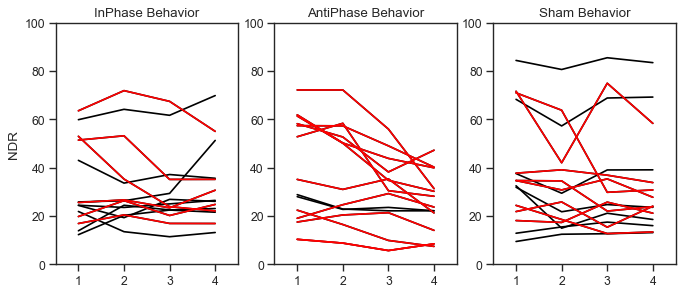

In [9]:
All_ACS_Bsl = pd.concat([G1_ACS_Bsl, G2_ACS_Bsl, G5_ACS_Bsl])
All_ACS_Bsl = All_ACS_Bsl.reset_index(drop=True)
All_P10_ACS = pd.concat([G1_P10_ACS, G2_P10_ACS, G5_P10_ACS])
All_P10_ACS = All_P10_ACS.reset_index(drop=True)
All_P30_P10 = pd.concat([G1_P30_P10, G2_P30_P10, G5_P30_P10])
All_P30_P10 = All_P30_P10.reset_index(drop=True)

thr_ACS_Bsl = np.mean(All_ACS_Bsl.values)
thr_P10_ACS = np.mean(All_P10_ACS.values)
thr_P30_P10 = np.mean(All_P30_P10.values)
print(thr_ACS_Bsl, thr_P10_ACS, thr_P30_P10)

G1_ACS_over = np.where(G1_ACS_Bsl<=thr_ACS_Bsl)
G1_P10_over = np.where(G1_P10_ACS<=thr_ACS_Bsl)
G1_P30_over = np.where(G1_P30_P10<=thr_ACS_Bsl)
G2_ACS_over = np.where(G2_ACS_Bsl<=thr_ACS_Bsl)
G2_P10_over = np.where(G2_P10_ACS<=thr_ACS_Bsl)
G2_P30_over = np.where(G2_P30_P10<=thr_ACS_Bsl)
G5_ACS_over = np.where(G5_ACS_Bsl<=thr_ACS_Bsl)
G5_P10_over = np.where(G5_P10_ACS<=thr_ACS_Bsl)
G5_P30_over = np.where(G5_P30_P10<=thr_ACS_Bsl)
# G1_P10_over = np.where(G1_P10_ACS<=thr_P10_ACS)
# G1_P30_over = np.where(G1_P30_P10<=thr_P30_P10)
# G2_ACS_over = np.where(G2_ACS_Bsl<=thr_ACS_Bsl)
# G2_P10_over = np.where(G2_P10_ACS<=thr_P10_ACS)
# G2_P30_over = np.where(G2_P30_P10<=thr_P30_P10)
# G5_ACS_over = np.where(G5_ACS_Bsl<=thr_ACS_Bsl)
# G5_P10_over = np.where(G5_P10_ACS<=thr_P10_ACS)
# G5_P30_over = np.where(G5_P30_P10<=thr_P30_P10)
over = np.sort(np.concatenate([42+G1_ACS_over[0], 84+G2_ACS_over[0], 126+G5_ACS_over[0],
                               56+G1_P10_over[0], 98+G2_P10_over[0], 140+G5_P10_over[0],
                               69+G1_P30_over[0], 111+G2_P30_over[0], 153+G5_P30_over[0]]))
print(over)

plt.figure(figsize=(10, 4), dpi= 80)
plt.subplot(1,3,1)
plt.plot([1,2,3,4],[df_lea.loc[G1_Bsl]['NDR'],df_lea.loc[G1_ACS]['NDR'],df_lea.loc[G1_P10]['NDR'],df_lea.loc[G1_P30]['NDR']], c='black')
plt.plot([1,2,3,4],[df_lea.loc[G1_Bsl]['NDR'][0],df_lea.loc[G1_ACS]['NDR'][42+0],df_lea.loc[G1_P10]['NDR'][84+0],df_lea.loc[G1_P30]['NDR'][126+0]], c='red')
plt.plot([1,2,3,4],[df_lea.loc[G1_Bsl]['NDR'][1],df_lea.loc[G1_ACS]['NDR'][42+1],df_lea.loc[G1_P10]['NDR'][84+1],df_lea.loc[G1_P30]['NDR'][126+1]], c='red')
plt.plot([1,2,3,4],[df_lea.loc[G1_Bsl]['NDR'][6],df_lea.loc[G1_ACS]['NDR'][42+6],df_lea.loc[G1_P10]['NDR'][84+6],df_lea.loc[G1_P30]['NDR'][126+6]], c='red')
plt.plot([1,2,3,4],[df_lea.loc[G1_Bsl]['NDR'][9],df_lea.loc[G1_ACS]['NDR'][42+9],df_lea.loc[G1_P10]['NDR'][84+9],df_lea.loc[G1_P30]['NDR'][126+9]], c='red')
plt.plot([1,2,3,4],[df_lea.loc[G1_Bsl]['NDR'][10],df_lea.loc[G1_ACS]['NDR'][42+10],df_lea.loc[G1_P10]['NDR'][84+10],df_lea.loc[G1_P30]['NDR'][126+10]], c='red')
plt.plot([1,2,3,4],[df_lea.loc[G1_Bsl]['NDR'][11],df_lea.loc[G1_ACS]['NDR'][42+11],df_lea.loc[G1_P10]['NDR'][84+11],df_lea.loc[G1_P30]['NDR'][126+11]], c='red')
plt.title('InPhase Behavior')
plt.ylabel('NDR')
plt.ylim(0,100)
plt.xlim(0.5,4.5)
plt.subplot(1,3,2)
plt.plot([1,2,3,4],[df.loc[G2_Bsl]['NDR'],df.loc[G2_ACS]['NDR'],df.loc[G2_P10]['NDR'],df.loc[G2_P30]['NDR']], c='black')
plt.plot([1,2,3,4],[df_lea.loc[G2_Bsl]['NDR'][14+0],df_lea.loc[G2_ACS]['NDR'][56+0],df_lea.loc[G2_P10]['NDR'][98+0],df_lea.loc[G2_P30]['NDR'][140+0]], c='red')
plt.plot([1,2,3,4],[df_lea.loc[G2_Bsl]['NDR'][14+1],df_lea.loc[G2_ACS]['NDR'][56+1],df_lea.loc[G2_P10]['NDR'][98+1],df_lea.loc[G2_P30]['NDR'][140+1]], c='red')
plt.plot([1,2,3,4],[df_lea.loc[G2_Bsl]['NDR'][14+5],df_lea.loc[G2_ACS]['NDR'][56+5],df_lea.loc[G2_P10]['NDR'][98+5],df_lea.loc[G2_P30]['NDR'][140+5]], c='red')
plt.plot([1,2,3,4],[df_lea.loc[G2_Bsl]['NDR'][14+6],df_lea.loc[G2_ACS]['NDR'][56+6],df_lea.loc[G2_P10]['NDR'][98+6],df_lea.loc[G2_P30]['NDR'][140+6]], c='red')
plt.plot([1,2,3,4],[df_lea.loc[G2_Bsl]['NDR'][14+7],df_lea.loc[G2_ACS]['NDR'][56+7],df_lea.loc[G2_P10]['NDR'][98+7],df_lea.loc[G2_P30]['NDR'][140+7]], c='red')
plt.plot([1,2,3,4],[df_lea.loc[G2_Bsl]['NDR'][14+8],df_lea.loc[G2_ACS]['NDR'][56+8],df_lea.loc[G2_P10]['NDR'][98+8],df_lea.loc[G2_P30]['NDR'][140+8]], c='red')
plt.plot([1,2,3,4],[df_lea.loc[G2_Bsl]['NDR'][14+9],df_lea.loc[G2_ACS]['NDR'][56+9],df_lea.loc[G2_P10]['NDR'][98+9],df_lea.loc[G2_P30]['NDR'][140+9]], c='red')
plt.plot([1,2,3,4],[df_lea.loc[G2_Bsl]['NDR'][14+10],df_lea.loc[G2_ACS]['NDR'][56+10],df_lea.loc[G2_P10]['NDR'][98+10],df_lea.loc[G2_P30]['NDR'][140+10]], c='red')
plt.plot([1,2,3,4],[df_lea.loc[G2_Bsl]['NDR'][14+6],df_lea.loc[G2_ACS]['NDR'][56+6],df_lea.loc[G2_P10]['NDR'][98+6],df_lea.loc[G2_P30]['NDR'][140+6]], c='red')
plt.plot([1,2,3,4],[df_lea.loc[G2_Bsl]['NDR'][14+3],df_lea.loc[G2_ACS]['NDR'][56+3],df_lea.loc[G2_P10]['NDR'][98+3],df_lea.loc[G2_P30]['NDR'][140+3]], c='red')
plt.plot([1,2,3,4],[df_lea.loc[G2_Bsl]['NDR'][14+4],df_lea.loc[G2_ACS]['NDR'][56+4],df_lea.loc[G2_P10]['NDR'][98+4],df_lea.loc[G2_P30]['NDR'][140+4]], c='red')
plt.plot([1,2,3,4],[df_lea.loc[G2_Bsl]['NDR'][14+11],df_lea.loc[G2_ACS]['NDR'][56+11],df_lea.loc[G2_P10]['NDR'][98+11],df_lea.loc[G2_P30]['NDR'][140+11]], c='red')
plt.title('AntiPhase Behavior')
plt.ylim(0,100)
plt.xlim(0.5,4.5)
plt.subplot(1,3,3)
plt.plot([1,2,3,4],[df.loc[G5_Bsl]['NDR'],df.loc[G5_ACS]['NDR'],df.loc[G5_P10]['NDR'],df.loc[G5_P30]['NDR']], c='black')
plt.plot([1,2,3,4],[df_lea.loc[G5_Bsl]['NDR'][27+0],df_lea.loc[G5_ACS]['NDR'][69+0],df_lea.loc[G5_P10]['NDR'][111+0],df_lea.loc[G5_P30]['NDR'][153+0]], c='red')
plt.plot([1,2,3,4],[df_lea.loc[G5_Bsl]['NDR'][27+1],df_lea.loc[G5_ACS]['NDR'][69+1],df_lea.loc[G5_P10]['NDR'][111+1],df_lea.loc[G5_P30]['NDR'][153+1]], c='red')
plt.plot([1,2,3,4],[df_lea.loc[G5_Bsl]['NDR'][27+11],df_lea.loc[G5_ACS]['NDR'][69+11],df_lea.loc[G5_P10]['NDR'][111+11],df_lea.loc[G5_P30]['NDR'][153+11]], c='red')
plt.plot([1,2,3,4],[df_lea.loc[G5_Bsl]['NDR'][27+12],df_lea.loc[G5_ACS]['NDR'][69+12],df_lea.loc[G5_P10]['NDR'][111+12],df_lea.loc[G5_P30]['NDR'][153+12]], c='red')
plt.plot([1,2,3,4],[df_lea.loc[G5_Bsl]['NDR'][27+5],df_lea.loc[G5_ACS]['NDR'][69+5],df_lea.loc[G5_P10]['NDR'][111+5],df_lea.loc[G5_P30]['NDR'][153+5]], c='red')
plt.plot([1,2,3,4],[df_lea.loc[G5_Bsl]['NDR'][27+7],df_lea.loc[G5_ACS]['NDR'][69+7],df_lea.loc[G5_P10]['NDR'][111+7],df_lea.loc[G5_P30]['NDR'][153+7]], c='red')
plt.plot([1,2,3,4],[df_lea.loc[G5_Bsl]['NDR'][27+9],df_lea.loc[G5_ACS]['NDR'][69+9],df_lea.loc[G5_P10]['NDR'][111+9],df_lea.loc[G5_P30]['NDR'][153+9]], c='red')
plt.plot([1,2,3,4],[df_lea.loc[G5_Bsl]['NDR'][27+13],df_lea.loc[G5_ACS]['NDR'][69+13],df_lea.loc[G5_P10]['NDR'][111+13],df_lea.loc[G5_P30]['NDR'][153+13]], c='red')
plt.title('Sham Behavior')
plt.ylim(0,100)
plt.xlim(0.5,4.5)

# plt.figure(figsize=(10, 4), dpi= 80)
# plt.subplot(1,3,1)
# plt.plot([1,2,3,4],[df_lea.loc[G1_Bsl]['NDR'],df_lea.loc[G1_ACS]['NDR'],df_lea.loc[G1_P10]['NDR'],df_lea.loc[G1_P30]['NDR']], c='black')
# plt.plot([1,2,3,4],[df_lea.loc[G1_Bsl]['NDR'][0],df_lea.loc[G1_ACS]['NDR'][42+0],df_lea.loc[G1_P10]['NDR'][84+0],df_lea.loc[G1_P30]['NDR'][126+0]], c='red')
# plt.plot([1,2,3,4],[df_lea.loc[G1_Bsl]['NDR'][1],df_lea.loc[G1_ACS]['NDR'][42+1],df_lea.loc[G1_P10]['NDR'][84+1],df_lea.loc[G1_P30]['NDR'][126+1]], c='red')
# plt.plot([1,2,3,4],[df_lea.loc[G1_Bsl]['NDR'][6],df_lea.loc[G1_ACS]['NDR'][42+6],df_lea.loc[G1_P10]['NDR'][84+6],df_lea.loc[G1_P30]['NDR'][126+6]], c='red')
# plt.plot([1,2,3,4],[df_lea.loc[G1_Bsl]['NDR'][9],df_lea.loc[G1_ACS]['NDR'][42+9],df_lea.loc[G1_P10]['NDR'][84+9],df_lea.loc[G1_P30]['NDR'][126+9]], c='red')
# plt.plot([1,2,3,4],[df_lea.loc[G1_Bsl]['NDR'][10],df_lea.loc[G1_ACS]['NDR'][42+10],df_lea.loc[G1_P10]['NDR'][84+10],df_lea.loc[G1_P30]['NDR'][126+10]], c='red')
# plt.plot([1,2,3,4],[df_lea.loc[G1_Bsl]['NDR'][11],df_lea.loc[G1_ACS]['NDR'][42+11],df_lea.loc[G1_P10]['NDR'][84+11],df_lea.loc[G1_P30]['NDR'][126+11]], c='blue')
# plt.title('InPhase Behavior')
# plt.ylabel('NDR')
# plt.ylim(0,100)
# plt.xlim(0.5,4.5)
# plt.subplot(1,3,2)
# plt.plot([1,2,3,4],[df.loc[G2_Bsl]['NDR'],df.loc[G2_ACS]['NDR'],df.loc[G2_P10]['NDR'],df.loc[G2_P30]['NDR']], c='black')
# plt.plot([1,2,3,4],[df_lea.loc[G2_Bsl]['NDR'][14+0],df_lea.loc[G2_ACS]['NDR'][56+0],df_lea.loc[G2_P10]['NDR'][98+0],df_lea.loc[G2_P30]['NDR'][140+0]], c='blue')
# plt.plot([1,2,3,4],[df_lea.loc[G2_Bsl]['NDR'][14+1],df_lea.loc[G2_ACS]['NDR'][56+1],df_lea.loc[G2_P10]['NDR'][98+1],df_lea.loc[G2_P30]['NDR'][140+1]], c='red')
# plt.plot([1,2,3,4],[df_lea.loc[G2_Bsl]['NDR'][14+5],df_lea.loc[G2_ACS]['NDR'][56+5],df_lea.loc[G2_P10]['NDR'][98+5],df_lea.loc[G2_P30]['NDR'][140+5]], c='red')
# plt.plot([1,2,3,4],[df_lea.loc[G2_Bsl]['NDR'][14+6],df_lea.loc[G2_ACS]['NDR'][56+6],df_lea.loc[G2_P10]['NDR'][98+6],df_lea.loc[G2_P30]['NDR'][140+6]], c='red')
# plt.plot([1,2,3,4],[df_lea.loc[G2_Bsl]['NDR'][14+7],df_lea.loc[G2_ACS]['NDR'][56+7],df_lea.loc[G2_P10]['NDR'][98+7],df_lea.loc[G2_P30]['NDR'][140+7]], c='red')
# plt.plot([1,2,3,4],[df_lea.loc[G2_Bsl]['NDR'][14+8],df_lea.loc[G2_ACS]['NDR'][56+8],df_lea.loc[G2_P10]['NDR'][98+8],df_lea.loc[G2_P30]['NDR'][140+8]], c='blue')
# plt.plot([1,2,3,4],[df_lea.loc[G2_Bsl]['NDR'][14+9],df_lea.loc[G2_ACS]['NDR'][56+9],df_lea.loc[G2_P10]['NDR'][98+9],df_lea.loc[G2_P30]['NDR'][140+9]], c='blue')
# plt.plot([1,2,3,4],[df_lea.loc[G2_Bsl]['NDR'][14+10],df_lea.loc[G2_ACS]['NDR'][56+10],df_lea.loc[G2_P10]['NDR'][98+10],df_lea.loc[G2_P30]['NDR'][140+10]], c='blue')
# plt.plot([1,2,3,4],[df_lea.loc[G2_Bsl]['NDR'][14+6],df_lea.loc[G2_ACS]['NDR'][56+6],df_lea.loc[G2_P10]['NDR'][98+6],df_lea.loc[G2_P30]['NDR'][140+6]], c='red')
# plt.plot([1,2,3,4],[df_lea.loc[G2_Bsl]['NDR'][14+3],df_lea.loc[G2_ACS]['NDR'][56+3],df_lea.loc[G2_P10]['NDR'][98+3],df_lea.loc[G2_P30]['NDR'][140+3]], c='green')
# plt.plot([1,2,3,4],[df_lea.loc[G2_Bsl]['NDR'][14+4],df_lea.loc[G2_ACS]['NDR'][56+4],df_lea.loc[G2_P10]['NDR'][98+4],df_lea.loc[G2_P30]['NDR'][140+4]], c='green')
# plt.plot([1,2,3,4],[df_lea.loc[G2_Bsl]['NDR'][14+11],df_lea.loc[G2_ACS]['NDR'][56+11],df_lea.loc[G2_P10]['NDR'][98+11],df_lea.loc[G2_P30]['NDR'][140+11]], c='green')
# plt.title('AntiPhase Behavior')
# plt.ylim(0,100)
# plt.xlim(0.5,4.5)
# plt.subplot(1,3,3)
# plt.plot([1,2,3,4],[df.loc[G5_Bsl]['NDR'],df.loc[G5_ACS]['NDR'],df.loc[G5_P10]['NDR'],df.loc[G5_P30]['NDR']], c='black')
# plt.plot([1,2,3,4],[df_lea.loc[G5_Bsl]['NDR'][27+0],df_lea.loc[G5_ACS]['NDR'][69+0],df_lea.loc[G5_P10]['NDR'][111+0],df_lea.loc[G5_P30]['NDR'][153+0]], c='red')
# plt.plot([1,2,3,4],[df_lea.loc[G5_Bsl]['NDR'][27+1],df_lea.loc[G5_ACS]['NDR'][69+1],df_lea.loc[G5_P10]['NDR'][111+1],df_lea.loc[G5_P30]['NDR'][153+1]], c='red')
# plt.plot([1,2,3,4],[df_lea.loc[G5_Bsl]['NDR'][27+11],df_lea.loc[G5_ACS]['NDR'][69+11],df_lea.loc[G5_P10]['NDR'][111+11],df_lea.loc[G5_P30]['NDR'][153+11]], c='red')
# plt.plot([1,2,3,4],[df_lea.loc[G5_Bsl]['NDR'][27+12],df_lea.loc[G5_ACS]['NDR'][69+12],df_lea.loc[G5_P10]['NDR'][111+12],df_lea.loc[G5_P30]['NDR'][153+12]], c='red')
# plt.plot([1,2,3,4],[df_lea.loc[G5_Bsl]['NDR'][27+5],df_lea.loc[G5_ACS]['NDR'][69+5],df_lea.loc[G5_P10]['NDR'][111+5],df_lea.loc[G5_P30]['NDR'][153+5]], c='green')
# plt.plot([1,2,3,4],[df_lea.loc[G5_Bsl]['NDR'][27+7],df_lea.loc[G5_ACS]['NDR'][69+7],df_lea.loc[G5_P10]['NDR'][111+7],df_lea.loc[G5_P30]['NDR'][153+7]], c='green')
# plt.plot([1,2,3,4],[df_lea.loc[G5_Bsl]['NDR'][27+9],df_lea.loc[G5_ACS]['NDR'][69+9],df_lea.loc[G5_P10]['NDR'][111+9],df_lea.loc[G5_P30]['NDR'][153+9]], c='green')
# plt.plot([1,2,3,4],[df_lea.loc[G5_Bsl]['NDR'][27+13],df_lea.loc[G5_ACS]['NDR'][69+13],df_lea.loc[G5_P10]['NDR'][111+13],df_lea.loc[G5_P30]['NDR'][153+13]], c='green')
# plt.title('Sham Behavior')
# plt.ylim(0,100)
# plt.xlim(0.5,4.5)

In [10]:
lea = [1 if number in over else 0 for number in range(168)] #Learner
learn = pd.DataFrame(lea, columns=['LEARN'])
learn = learn.reset_index(drop=True)

df_learn = pd.concat([df_lea, learn], axis=1)
print(df_learn)

model = sm.MixedLM.from_formula('NDR ~ C(TIMEP)+C(LEARN)*C(GROUP)+ZPAC', df_learn,
                                groups=df_learn['SUBJECT'], missing='drop')
result = model.fit(method='lbfgs')
print(result.summary())

          NDR      ZPAC  SUBJECT  GROUP  TIMEP  LEARN
0    51.47222  1.485400        1      1      0      0
1    19.83055  0.114913        2      1      0      0
2    25.87500  0.657654        3      1      0      0
3    59.91389  1.004652        4      1      0      0
4    13.93056  0.716960        5      1      0      0
..        ...       ...      ...    ...    ...    ...
163  23.63889 -0.776255       38      5     30      0
164  24.11111  3.175248       39      5     30      0
165  30.83333 -0.044575       40      5     30      0
166  27.80556  0.956283       41      5     30      1
167  18.61111  1.025378       42      5     30      0

[168 rows x 6 columns]
                 Mixed Linear Model Regression Results
Model:                   MixedLM      Dependent Variable:      NDR      
No. Observations:        126          Method:                  REML     
No. Groups:              42           Scale:                   56.4476  
Min. group size:         3            Likelihood:     

In [58]:
G1_over = np.sort(np.concatenate([42+G1_ACS_over[0], 56+G1_P10_over[0], 69+G1_P30_over[0]]))
G2_over = np.sort(np.concatenate([84+G2_ACS_over[0], 98+G2_P10_over[0], 111+G2_P30_over[0]]))
G5_over = np.sort(np.concatenate([126+G5_ACS_over[0], 140+G5_P10_over[0], 153+G5_P30_over[0]]))
 
#learning = np.zeros([168])    
G1_lea = np.asarray([10 if number in G1_over else 0 if number not in range(42,83+1) else 1 for number in range(168)]) #Learner
G2_lea = np.asarray([20 if number in G2_over else 0 if number not in range(84,125+1) else 2 for number in range(168)])
G5_lea = np.asarray([50 if number in G5_over else 0 if number not in range(126,167+1) else 5 for number in range(168)])
lea = G1_lea+G2_lea+G5_lea
print(lea)
learn = pd.DataFrame(lea, columns=['LEARN'])
learn = learn.reset_index(drop=True)

df_learn = pd.concat([df_lea, learn], axis=1)
print(df_learn)

model = sm.MixedLM.from_formula('NDR ~ C(TIMEP)+C(GROUP)*C(LEARN)*ZPAC', df_learn,
                                groups=df_learn['SUBJECT'], missing='drop')
result = model.fit(method='lbfgs')
print(result.summary())

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1
  1 10  1  1 10  1 10 10 10 10  1  1  1  1 10  1  1 10 10 10  1  1  1  1
  1  1  1  1  1  1  1  1 10  1  1  1 20 20 20  2  2  2  2 20  2 20  2 20
 20  2 20 20  2  2  2 20 20 20 20 20 20  2  2 20  2  2 20 20  2  2  2 20
 20 20 20  2  2  2  5 50 50 50  5  5  5  5 50 50 50  5 50 50 50 50  5  5
  5  5  5  5  5  5  5 50 50  5  5  5  5  5 50  5 50  5 50  5  5  5 50  5]
          NDR      ZPAC  SUBJECT  GROUP  TIMEP  LEARN
0    51.47222  1.485400        1      1      0      0
1    19.83055  0.114913        2      1      0      0
2    25.87500  0.657654        3      1      0      0
3    59.91389  1.004652        4      1      0      0
4    13.93056  0.716960        5      1      0      0
..        ...       ...      ...    ...    ...    ...
163  23.63889 -0.776255       38      5     30      5
164  24.11111  3.175248       39      5     30      5
16

/home/robertofelipe_sg/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/robertofelipe_sg/anaconda3/lib/python3.6/site-packages/statsmodels/regression/mixed_linear_model.py:2063: ConvergenceWarning: MixedLM optimization failed, trying a different optimizer may help.
  warnings.warn(msg, ConvergenceWarning)
/home/robertofelipe_sg/anaconda3/lib/python3.6/site-packages/statsmodels/regression/mixed_linear_model.py:2075: ConvergenceWarning: Gradient optimization failed, |grad| = 0.008310
  warnings.warn(msg, ConvergenceWarning)


In [ ]:
### K-means algorithm
## Visualize all timepoints mixed up
# plt.figure()
# plt.boxplot([G1_ACS_Bsl, G1_P30_Bsl, G2_ACS_Bsl, G2_P30_Bsl], showmeans=1, labels=('G1:ACS-Bsl', 'G1:P30-Bsl', 'G2:ACS-Bsl', 'G2:P30-Bsl'))
# for i in range(13):
#     plt.scatter([1,2,3,4], [G1_ACS_Bsl.values[i], G1_P30_Bsl.values[i], G2_ACS_Bsl.values[i], G2_P30_Bsl.values[i]])

## Clustering through KMeans = Euclidian Distance
# Bsl_kmeans = KMeans(n_clusters=2, random_state=0).fit(df_ml.loc[Bsl_index])
# P10_kmeans = KMeans(n_clusters=2, random_state=0).fit(df_ml.loc[P10_index])
# P30_kmeans = KMeans(n_clusters=2, random_state=0).fit(df_ml.loc[P30_index])
# print(kmeans.cluster_centers_)# Get the cluster centroids
# print(kmeans.labels_)# Get the cluster labels

# plt.figure(figsize=(12, 4), dpi= 80)
# plt.subplot(1,3,1)
# plt.scatter(df_ml.loc[Bsl_index]['ZPAC'], df_ml.loc[Bsl_index]['NDR'], c=Bsl_kmeans.labels_, cmap='rainbow')
# plt.title('Baseline')
# plt.ylabel('NDR')
# plt.xlabel('ZPAC')
# plt.subplot(1,3,2)
# plt.scatter(df_ml.loc[P10_index]['ZPAC'], df_ml.loc[P10_index]['NDR'], c=P10_kmeans.labels_, cmap='rainbow')
# plt.title('Post10')
# plt.xlabel('ZPAC')
# plt.subplot(1,3,3)
# plt.scatter(df_ml.loc[P30_index]['ZPAC'], df_ml.loc[P30_index]['NDR'], c=P30_kmeans.labels_, cmap='rainbow')
# plt.title('Post30')
# plt.xlabel('ZPAC')

336
(array([ 7, 10, 12, 13, 14, 15, 16, 20, 21, 23, 25, 26, 28, 29, 35, 36, 37,
       39, 40, 41]),) (array([ 0,  6,  7, 10, 12, 14, 15, 16, 19, 20, 21, 22, 23, 24, 26, 27, 28,
       37, 38, 39, 41]),) (array([ 0,  7, 10, 11, 12, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 34, 36, 37, 39, 40, 41]),)
[ 49  52  54  55  56  57  58  62  63  65  67  68  70  71  77  78  79  81
  82  83  84  90  91  94  96  98  99 100 103 104 105 106 107 108 110 111
 112 121 122 123 125 126 133 136 137 138 140 141 142 143 145 146 147 148
 149 150 151 152 153 154 160 162 163 165 166 167]
[49 52 54 55] [84 90 91 94 96] [126 133 136 137 138] [56 57 58 62 63 65 67 68] [ 98  99 100 103 104 105 106 107 108 110] [140 141 142 143 145 146 147 148 149 150 151 152] [70 71 77 78 79 81 82 83] [111 112 121 122 123 125] [153 154 160 162 163 165 166 167]


/home/robertofelipe_sg/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


(0.5, 4.5)

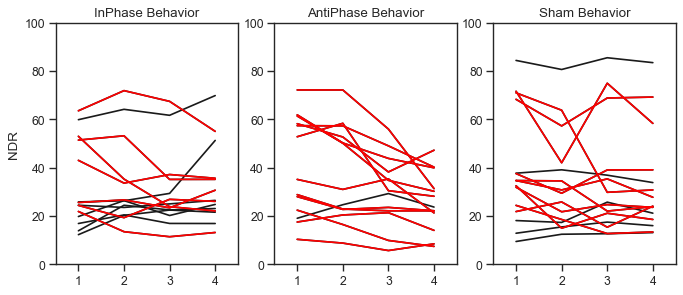

In [12]:
### Within Subjects
df_fin = pd.read_csv('Mixed_mod.txt', sep=r'\s', header=0, names = ['NDR', 'ZPAC', 'ORIENT', 'SUBJECT', 'GROUP', 'TIMEP'])
print(len(df_fin))

orient = df_fin.groupby(df_fin['ORIENT']).groups
zero_index = orient[0].values
one_index = orient[1].values
df_fin.drop(df_fin.index[one_index], inplace= True)
df_fin.drop(['ORIENT'], axis= 1, inplace= True)
df_fin = df_fin.reset_index(drop=True)
#print(df_fin)

All_Bsl = df_fin.loc[Bsl_index]['NDR']
All_Bsl_thr = All_Bsl*0.95
# print(All_Bsl, All_Bsl_thr)

timep = df_fin.groupby(df_fin['TIMEP']).groups
Bsl_index = timep[0].values
ACS_index = timep[5].values
P10_index = timep[10].values
P30_index = timep[30].values
#print(ACS_index, P10_index, P30_index)

ACS_over = np.where(df_fin.loc[ACS_index]['NDR'].values<=All_Bsl_thr)
P10_over = np.where(df_fin.loc[P10_index]['NDR'].values<=All_Bsl_thr)
P30_over = np.where(df_fin.loc[P30_index]['NDR'].values<=All_Bsl_thr)
print(ACS_over, P10_over, P30_over)

All_over = np.sort(np.concatenate([42+ACS_over[0], 84+P10_over[0], 126+P30_over[0]]))
print(All_over)
    
All_lea = np.asarray([1 if number in All_over else 0 for number in range(168)]) #Learner
learnt = pd.DataFrame(All_lea, columns=['LEARN'])
learnt = learnt.reset_index(drop=True)

df_fin = pd.concat([df_fin, learnt], axis=1)
#print(df_fin)

learner = df_fin.groupby(df_fin['LEARN']).groups
group = df_fin.groupby(df_fin['GROUP']).groups

G1_ACS_Le = timep[5].intersection(group[1]).intersection(learner[1]).values
G1_P10_Le = timep[10].intersection(group[1]).intersection(learner[1]).values
G1_P30_Le = timep[30].intersection(group[1]).intersection(learner[1]).values
G2_ACS_Le = timep[5].intersection(group[2]).intersection(learner[1]).values
G2_P10_Le = timep[10].intersection(group[2]).intersection(learner[1]).values
G2_P30_Le = timep[30].intersection(group[2]).intersection(learner[1]).values
G5_ACS_Le = timep[5].intersection(group[5]).intersection(learner[1]).values
G5_P10_Le = timep[10].intersection(group[5]).intersection(learner[1]).values
G5_P30_Le = timep[30].intersection(group[5]).intersection(learner[1]).values
print(G1_ACS_Le, G1_P10_Le, G1_P30_Le,
     G2_ACS_Le, G2_P10_Le, G2_P30_Le,
     G5_ACS_Le, G5_P10_Le, G5_P30_Le)

plt.figure(figsize=(10, 4), dpi= 80)
plt.subplot(1,3,1)
plt.plot([1,2,3,4],[df_fin.loc[G1_Bsl]['NDR'],df_fin.loc[G1_ACS]['NDR'],df_fin.loc[G1_P10]['NDR'],df_fin.loc[G1_P30]['NDR']], c='k')
plt.plot([1,2,3,4],[df_fin.loc[G1_Bsl]['NDR'][7],df_fin.loc[G1_ACS]['NDR'][42+7],df_fin.loc[G1_P10]['NDR'][84+7],df_fin.loc[G1_P30]['NDR'][126+7]], c='red')
plt.plot([1,2,3,4],[df_fin.loc[G1_Bsl]['NDR'][10],df_fin.loc[G1_ACS]['NDR'][42+10],df_fin.loc[G1_P10]['NDR'][84+10],df_fin.loc[G1_P30]['NDR'][126+10]], c='red')
plt.plot([1,2,3,4],[df_fin.loc[G1_Bsl]['NDR'][12],df_fin.loc[G1_ACS]['NDR'][42+12],df_fin.loc[G1_P10]['NDR'][84+12],df_fin.loc[G1_P30]['NDR'][126+12]], c='red')
plt.plot([1,2,3,4],[df_fin.loc[G1_Bsl]['NDR'][6],df_fin.loc[G1_ACS]['NDR'][42+6],df_fin.loc[G1_P10]['NDR'][84+6],df_fin.loc[G1_P30]['NDR'][126+6]], c='red')
plt.plot([1,2,3,4],[df_fin.loc[G1_Bsl]['NDR'][11],df_fin.loc[G1_ACS]['NDR'][42+11],df_fin.loc[G1_P10]['NDR'][84+11],df_fin.loc[G1_P30]['NDR'][126+11]], c='red')
plt.plot([1,2,3,4],[df_fin.loc[G1_Bsl]['NDR'][13],df_fin.loc[G1_ACS]['NDR'][42+13],df_fin.loc[G1_P10]['NDR'][84+13],df_fin.loc[G1_P30]['NDR'][126+13]], c='red')
plt.plot([1,2,3,4],[df_fin.loc[G1_Bsl]['NDR'][0],df_fin.loc[G1_ACS]['NDR'][42+0],df_fin.loc[G1_P10]['NDR'][84+0],df_fin.loc[G1_P30]['NDR'][126+0]], c='red')
plt.title('InPhase Behavior')
plt.ylabel('NDR')
plt.ylim(0,100)
plt.xlim(0.5,4.5)
plt.subplot(1,3,2)
plt.plot([1,2,3,4],[df.loc[G2_Bsl]['NDR'],df.loc[G2_ACS]['NDR'],df.loc[G2_P10]['NDR'],df.loc[G2_P30]['NDR']], c='k')
plt.plot([1,2,3,4],[df_fin.loc[G2_Bsl]['NDR'][14+0],df_fin.loc[G2_ACS]['NDR'][42+14],df_fin.loc[G2_P10]['NDR'][84+14],df_fin.loc[G2_P30]['NDR'][126+14]], c='red')
plt.plot([1,2,3,4],[df_fin.loc[G2_Bsl]['NDR'][15],df_fin.loc[G2_ACS]['NDR'][42+15],df_fin.loc[G2_P10]['NDR'][84+15],df_fin.loc[G2_P30]['NDR'][126+15]], c='red')
plt.plot([1,2,3,4],[df_fin.loc[G2_Bsl]['NDR'][16],df_fin.loc[G2_ACS]['NDR'][42+16],df_fin.loc[G2_P10]['NDR'][84+16],df_fin.loc[G2_P30]['NDR'][126+16]], c='red')
plt.plot([1,2,3,4],[df_fin.loc[G2_Bsl]['NDR'][20],df_fin.loc[G2_ACS]['NDR'][42+20],df_fin.loc[G2_P10]['NDR'][84+20],df_fin.loc[G2_P30]['NDR'][126+20]], c='red')
plt.plot([1,2,3,4],[df_fin.loc[G2_Bsl]['NDR'][21],df_fin.loc[G2_ACS]['NDR'][42+21],df_fin.loc[G2_P10]['NDR'][84+21],df_fin.loc[G2_P30]['NDR'][126+21]], c='red')
plt.plot([1,2,3,4],[df_fin.loc[G2_Bsl]['NDR'][23],df_fin.loc[G2_ACS]['NDR'][42+23],df_fin.loc[G2_P10]['NDR'][84+23],df_fin.loc[G2_P30]['NDR'][126+23]], c='red')
plt.plot([1,2,3,4],[df_fin.loc[G2_Bsl]['NDR'][26],df_fin.loc[G2_ACS]['NDR'][42+26],df_fin.loc[G2_P10]['NDR'][84+26],df_fin.loc[G2_P30]['NDR'][126+26]], c='red')
plt.plot([1,2,3,4],[df_fin.loc[G2_Bsl]['NDR'][25],df_fin.loc[G2_ACS]['NDR'][42+25],df_fin.loc[G2_P10]['NDR'][84+25],df_fin.loc[G2_P30]['NDR'][126+25]], c='red')
plt.plot([1,2,3,4],[df_fin.loc[G2_Bsl]['NDR'][19],df_fin.loc[G2_ACS]['NDR'][42+19],df_fin.loc[G2_P10]['NDR'][84+19],df_fin.loc[G2_P30]['NDR'][126+19]], c='red')
plt.plot([1,2,3,4],[df_fin.loc[G2_Bsl]['NDR'][22],df_fin.loc[G2_ACS]['NDR'][42+22],df_fin.loc[G2_P10]['NDR'][84+22],df_fin.loc[G2_P30]['NDR'][126+22]], c='red')
plt.plot([1,2,3,4],[df_fin.loc[G2_Bsl]['NDR'][24],df_fin.loc[G2_ACS]['NDR'][42+24],df_fin.loc[G2_P10]['NDR'][84+24],df_fin.loc[G2_P30]['NDR'][126+24]], c='red')
plt.plot([1,2,3,4],[df_fin.loc[G2_Bsl]['NDR'][17],df_fin.loc[G2_ACS]['NDR'][42+17],df_fin.loc[G2_P10]['NDR'][84+17],df_fin.loc[G2_P30]['NDR'][126+17]], c='red')
plt.title('AntiPhase Behavior')
plt.ylim(0,100)
plt.xlim(0.5,4.5)
plt.subplot(1,3,3)
plt.plot([1,2,3,4],[df.loc[G5_Bsl]['NDR'],df.loc[G5_ACS]['NDR'],df.loc[G5_P10]['NDR'],df.loc[G5_P30]['NDR']], c='k')
plt.plot([1,2,3,4],[df_fin.loc[G5_Bsl]['NDR'][28],df_fin.loc[G5_ACS]['NDR'][42+28],df_fin.loc[G5_P10]['NDR'][84+28],df_fin.loc[G5_P30]['NDR'][126+28]], c='red')
plt.plot([1,2,3,4],[df_fin.loc[G5_Bsl]['NDR'][37],df_fin.loc[G5_ACS]['NDR'][42+37],df_fin.loc[G5_P10]['NDR'][84+37],df_fin.loc[G5_P30]['NDR'][126+37]], c='red')
plt.plot([1,2,3,4],[df_fin.loc[G5_Bsl]['NDR'][39],df_fin.loc[G5_ACS]['NDR'][42+39],df_fin.loc[G5_P10]['NDR'][84+39],df_fin.loc[G5_P30]['NDR'][126+39]], c='red')
plt.plot([1,2,3,4],[df_fin.loc[G5_Bsl]['NDR'][41],df_fin.loc[G5_ACS]['NDR'][42+41],df_fin.loc[G5_P10]['NDR'][84+41],df_fin.loc[G5_P30]['NDR'][126+41]], c='red')
plt.plot([1,2,3,4],[df_fin.loc[G5_Bsl]['NDR'][29],df_fin.loc[G5_ACS]['NDR'][42+29],df_fin.loc[G5_P10]['NDR'][84+29],df_fin.loc[G5_P30]['NDR'][126+29]], c='red')
plt.plot([1,2,3,4],[df_fin.loc[G5_Bsl]['NDR'][35],df_fin.loc[G5_ACS]['NDR'][42+35],df_fin.loc[G5_P10]['NDR'][84+35],df_fin.loc[G5_P30]['NDR'][126+35]], c='red')
plt.plot([1,2,3,4],[df_fin.loc[G5_Bsl]['NDR'][36],df_fin.loc[G5_ACS]['NDR'][42+36],df_fin.loc[G5_P10]['NDR'][84+36],df_fin.loc[G5_P30]['NDR'][126+36]], c='red')
plt.plot([1,2,3,4],[df_fin.loc[G5_Bsl]['NDR'][27],df_fin.loc[G5_ACS]['NDR'][42+27],df_fin.loc[G5_P10]['NDR'][84+27],df_fin.loc[G5_P30]['NDR'][126+27]], c='red')
plt.plot([1,2,3,4],[df_fin.loc[G5_Bsl]['NDR'][40],df_fin.loc[G5_ACS]['NDR'][42+40],df_fin.loc[G5_P10]['NDR'][84+40],df_fin.loc[G5_P30]['NDR'][126+40]], c='red')
plt.plot([1,2,3,4],[df_fin.loc[G5_Bsl]['NDR'][38],df_fin.loc[G5_ACS]['NDR'][42+38],df_fin.loc[G5_P10]['NDR'][84+38],df_fin.loc[G5_P30]['NDR'][126+38]], c='red')
plt.title('Sham Behavior')
plt.ylim(0,100)
plt.xlim(0.5,4.5)

# plt.figure(figsize=(10, 4), dpi= 80)
# plt.subplot(1,3,1)
# plt.plot([1,2,3,4],[df_lea.loc[G1_Bsl]['NDR'],df_lea.loc[G1_ACS]['NDR'],df_lea.loc[G1_P10]['NDR'],df_lea.loc[G1_P30]['NDR']], c='silver')
# plt.plot([1,2,3,4],[df_lea.loc[G1_Bsl]['NDR'][7],df_lea.loc[G1_ACS]['NDR'][42+7],df_lea.loc[G1_P10]['NDR'][84+7],df_lea.loc[G1_P30]['NDR'][126+7]], c='k')
# plt.plot([1,2,3,4],[df_lea.loc[G1_Bsl]['NDR'][10],df_lea.loc[G1_ACS]['NDR'][42+10],df_lea.loc[G1_P10]['NDR'][84+10],df_lea.loc[G1_P30]['NDR'][126+10]], c='k')
# plt.plot([1,2,3,4],[df_lea.loc[G1_Bsl]['NDR'][12],df_lea.loc[G1_ACS]['NDR'][42+12],df_lea.loc[G1_P10]['NDR'][84+12],df_lea.loc[G1_P30]['NDR'][126+12]], c='k')
# plt.plot([1,2,3,4],[df_lea.loc[G1_Bsl]['NDR'][6],df_lea.loc[G1_ACS]['NDR'][42+6],df_lea.loc[G1_P10]['NDR'][84+6],df_lea.loc[G1_P30]['NDR'][126+6]], c='cyan')
# plt.plot([1,2,3,4],[df_lea.loc[G1_Bsl]['NDR'][11],df_lea.loc[G1_ACS]['NDR'][42+11],df_lea.loc[G1_P10]['NDR'][84+11],df_lea.loc[G1_P30]['NDR'][126+11]], c='r')
# plt.plot([1,2,3,4],[df_lea.loc[G1_Bsl]['NDR'][13],df_lea.loc[G1_ACS]['NDR'][42+13],df_lea.loc[G1_P10]['NDR'][84+13],df_lea.loc[G1_P30]['NDR'][126+13]], c='yellow')
# plt.plot([1,2,3,4],[df_lea.loc[G1_Bsl]['NDR'][0],df_lea.loc[G1_ACS]['NDR'][42+0],df_lea.loc[G1_P10]['NDR'][84+0],df_lea.loc[G1_P30]['NDR'][126+0]], c='m')
# plt.title('InPhase Behavior')
# plt.ylabel('NDR')
# plt.ylim(0,100)
# plt.xlim(0.5,4.5)
# plt.subplot(1,3,2)
# plt.plot([1,2,3,4],[df.loc[G2_Bsl]['NDR'],df.loc[G2_ACS]['NDR'],df.loc[G2_P10]['NDR'],df.loc[G2_P30]['NDR']], c='silver')
# plt.plot([1,2,3,4],[df_lea.loc[G2_Bsl]['NDR'][14+0],df_lea.loc[G2_ACS]['NDR'][42+14],df_lea.loc[G2_P10]['NDR'][84+14],df_lea.loc[G2_P30]['NDR'][126+14]], c='k')
# plt.plot([1,2,3,4],[df_lea.loc[G2_Bsl]['NDR'][15],df_lea.loc[G2_ACS]['NDR'][42+15],df_lea.loc[G2_P10]['NDR'][84+15],df_lea.loc[G2_P30]['NDR'][126+15]], c='k')
# plt.plot([1,2,3,4],[df_lea.loc[G2_Bsl]['NDR'][16],df_lea.loc[G2_ACS]['NDR'][42+16],df_lea.loc[G2_P10]['NDR'][84+16],df_lea.loc[G2_P30]['NDR'][126+16]], c='k')
# plt.plot([1,2,3,4],[df_lea.loc[G2_Bsl]['NDR'][20],df_lea.loc[G2_ACS]['NDR'][42+20],df_lea.loc[G2_P10]['NDR'][84+20],df_lea.loc[G2_P30]['NDR'][126+20]], c='k')
# plt.plot([1,2,3,4],[df_lea.loc[G2_Bsl]['NDR'][21],df_lea.loc[G2_ACS]['NDR'][42+21],df_lea.loc[G2_P10]['NDR'][84+21],df_lea.loc[G2_P30]['NDR'][126+21]], c='k')
# plt.plot([1,2,3,4],[df_lea.loc[G2_Bsl]['NDR'][23],df_lea.loc[G2_ACS]['NDR'][42+23],df_lea.loc[G2_P10]['NDR'][84+23],df_lea.loc[G2_P30]['NDR'][126+23]], c='k')
# plt.plot([1,2,3,4],[df_lea.loc[G2_Bsl]['NDR'][26],df_lea.loc[G2_ACS]['NDR'][42+26],df_lea.loc[G2_P10]['NDR'][84+26],df_lea.loc[G2_P30]['NDR'][126+26]], c='k')
# plt.plot([1,2,3,4],[df_lea.loc[G2_Bsl]['NDR'][25],df_lea.loc[G2_ACS]['NDR'][42+25],df_lea.loc[G2_P10]['NDR'][84+25],df_lea.loc[G2_P30]['NDR'][126+25]], c='orange')
# plt.plot([1,2,3,4],[df_lea.loc[G2_Bsl]['NDR'][19],df_lea.loc[G2_ACS]['NDR'][42+19],df_lea.loc[G2_P10]['NDR'][84+19],df_lea.loc[G2_P30]['NDR'][126+19]], c='m')
# plt.plot([1,2,3,4],[df_lea.loc[G2_Bsl]['NDR'][22],df_lea.loc[G2_ACS]['NDR'][42+22],df_lea.loc[G2_P10]['NDR'][84+22],df_lea.loc[G2_P30]['NDR'][126+22]], c='m')
# plt.plot([1,2,3,4],[df_lea.loc[G2_Bsl]['NDR'][24],df_lea.loc[G2_ACS]['NDR'][42+24],df_lea.loc[G2_P10]['NDR'][84+24],df_lea.loc[G2_P30]['NDR'][126+24]], c='m')
# plt.plot([1,2,3,4],[df_lea.loc[G2_Bsl]['NDR'][17],df_lea.loc[G2_ACS]['NDR'][42+17],df_lea.loc[G2_P10]['NDR'][84+17],df_lea.loc[G2_P30]['NDR'][126+17]], c='r')
# plt.title('AntiPhase Behavior')
# plt.ylim(0,100)
# plt.xlim(0.5,4.5)
# plt.subplot(1,3,3)
# plt.plot([1,2,3,4],[df.loc[G5_Bsl]['NDR'],df.loc[G5_ACS]['NDR'],df.loc[G5_P10]['NDR'],df.loc[G5_P30]['NDR']], c='silver')
# plt.plot([1,2,3,4],[df_lea.loc[G5_Bsl]['NDR'][28],df_lea.loc[G5_ACS]['NDR'][42+28],df_lea.loc[G5_P10]['NDR'][84+28],df_lea.loc[G5_P30]['NDR'][126+28]], c='k')
# plt.plot([1,2,3,4],[df_lea.loc[G5_Bsl]['NDR'][37],df_lea.loc[G5_ACS]['NDR'][42+37],df_lea.loc[G5_P10]['NDR'][84+37],df_lea.loc[G5_P30]['NDR'][126+37]], c='k')
# plt.plot([1,2,3,4],[df_lea.loc[G5_Bsl]['NDR'][39],df_lea.loc[G5_ACS]['NDR'][42+39],df_lea.loc[G5_P10]['NDR'][84+39],df_lea.loc[G5_P30]['NDR'][126+39]], c='k')
# plt.plot([1,2,3,4],[df_lea.loc[G5_Bsl]['NDR'][41],df_lea.loc[G5_ACS]['NDR'][42+41],df_lea.loc[G5_P10]['NDR'][84+41],df_lea.loc[G5_P30]['NDR'][126+41]], c='k')
# plt.plot([1,2,3,4],[df_lea.loc[G5_Bsl]['NDR'][29],df_lea.loc[G5_ACS]['NDR'][42+29],df_lea.loc[G5_P10]['NDR'][84+29],df_lea.loc[G5_P30]['NDR'][126+29]], c='yellow')
# plt.plot([1,2,3,4],[df_lea.loc[G5_Bsl]['NDR'][35],df_lea.loc[G5_ACS]['NDR'][42+35],df_lea.loc[G5_P10]['NDR'][84+35],df_lea.loc[G5_P30]['NDR'][126+35]], c='yellow')
# plt.plot([1,2,3,4],[df_lea.loc[G5_Bsl]['NDR'][36],df_lea.loc[G5_ACS]['NDR'][42+36],df_lea.loc[G5_P10]['NDR'][84+36],df_lea.loc[G5_P30]['NDR'][126+36]], c='yellow')
# plt.plot([1,2,3,4],[df_lea.loc[G5_Bsl]['NDR'][27],df_lea.loc[G5_ACS]['NDR'][42+27],df_lea.loc[G5_P10]['NDR'][84+27],df_lea.loc[G5_P30]['NDR'][126+27]], c='m')
# plt.plot([1,2,3,4],[df_lea.loc[G5_Bsl]['NDR'][40],df_lea.loc[G5_ACS]['NDR'][42+40],df_lea.loc[G5_P10]['NDR'][84+40],df_lea.loc[G5_P30]['NDR'][126+40]], c='orange')
# plt.plot([1,2,3,4],[df_lea.loc[G5_Bsl]['NDR'][38],df_lea.loc[G5_ACS]['NDR'][42+38],df_lea.loc[G5_P10]['NDR'][84+38],df_lea.loc[G5_P30]['NDR'][126+38]], c='cyan')
# plt.title('Sham Behavior')
# plt.ylim(0,100)
# plt.xlim(0.5,4.5)

In [13]:
### Mixed 6 Labeling Group*Learning (Any Timepoint)
from functools import reduce
#print(ACS_over, P10_over, P30_over)
All_learners = reduce(np.union1d, (np.asarray(ACS_over), np.asarray(P10_over), np.asarray(P30_over)))
print(All_learners)

G1_All_Learn = np.asarray([20 if number in All_learners else 2 for number in range(14)]) #Learner
G2_All_Learn = np.asarray([1 if number in All_learners else 10 for number in range(14, 26+1)])
G5_All_Learn = np.asarray([50 if number in All_learners else 5  for number in range(27, 41+1)])
All_Learn = np.concatenate([G1_All_Learn,G2_All_Learn,G5_All_Learn,G1_All_Learn,G2_All_Learn,G5_All_Learn,
                           G1_All_Learn,G2_All_Learn,G5_All_Learn,G1_All_Learn,G2_All_Learn,G5_All_Learn])
print(len(All_Learn))

gr_le = pd.DataFrame(All_Learn, columns=['GxL'])
gr_le = gr_le.reset_index(drop=True)
#print(gr_le)

df_gr_le = pd.concat([df_fin, gr_le], axis=1)
df_gr_le.drop(['GROUP', 'LEARN'], axis= 1, inplace= True)
df_gr_le.reset_index(drop=True)
#print(df_gr_le)

model_1 = sm.MixedLM.from_formula('NDR ~ C(TIMEP)+C(GxL)', df_gr_le,
                                groups=df_gr_le['SUBJECT'], missing='drop')
result_1 = model_1.fit(method='lbfgs')
print(result_1.summary())

model_2 = sm.MixedLM.from_formula('NDR ~ C(TIMEP)+C(GxL)+ZPAC', df_gr_le,
                                groups=df_gr_le['SUBJECT'], missing='drop')
result_2 = model_2.fit(method='lbfgs')
print(result_2.summary())

model_3 = sm.MixedLM.from_formula('NDR ~ C(TIMEP)+C(GxL)*ZPAC', df_gr_le,
                                groups=df_gr_le['SUBJECT'], missing='drop')
result_3 = model_3.fit(method='lbfgs')
print(result_3.summary())

[ 0  6  7 10 11 12 13 14 15 16 17 19 20 21 22 23 24 25 26 27 28 29 34 35
 36 37 38 39 40 41]
168
           Mixed Linear Model Regression Results
Model:              MixedLM  Dependent Variable:  NDR      
No. Observations:   168      Method:              REML     
No. Groups:         42       Scale:               58.6290  
Min. group size:    4        Likelihood:          -619.9991
Max. group size:    4        Converged:           Yes      
Mean group size:    4.0                                    
-----------------------------------------------------------
                Coef.  Std.Err.   z    P>|z|  [0.025 0.975]
-----------------------------------------------------------
Intercept       38.254    5.417  7.061 0.000  27.635 48.872
C(TIMEP)[T.5]   -2.882    1.671 -1.725 0.085  -6.157  0.393
C(TIMEP)[T.10]  -5.393    1.671 -3.227 0.001  -8.668 -2.118
C(TIMEP)[T.30]  -6.845    1.671 -4.097 0.000 -10.120 -3.570
C(GxL)[T.2]     -5.473    8.765 -0.624 0.532 -22.652 11.705
C(GxL)[T.5]   

In [14]:
### Mixed Labeling Group*Learning*Timepoint
G1_NL = group[1].intersection(learner[0]).values
G2_NL = group[2].intersection(learner[0]).values
G5_NL = group[5].intersection(learner[0]).values
# print(G1_NL)

G1_Le_over = np.sort(np.concatenate([G1_ACS_Le, G1_P10_Le, G1_P30_Le]))
G2_Le_over = np.sort(np.concatenate([G2_ACS_Le, G2_P10_Le, G2_P30_Le]))
G5_Le_over = np.sort(np.concatenate([G5_ACS_Le, G5_P10_Le, G5_P30_Le]))
#print(G1_Le_over,G2_Le_over,G5_Le_over)
    
G1_Le = np.asarray([10 if number in G1_Le_over else 1 if number in G1_NL else 0 for number in range(168)]) #Learner
G2_Le = np.asarray([20 if number in G2_Le_over else 2 if number in G2_NL else 0 for number in range(168)])
G5_Le = np.asarray([50 if number in G5_Le_over else 5 if number in G5_NL else 0 for number in range(168)])
#print(G1_Le, G2_Le, G5_Le)
Le = G1_Le + G2_Le + G5_Le
print(Le)

# model = sm.MixedLM.from_formula('NDR ~ C(TIMEP)+C(GROUP)*C(LEARN)*ZPAC', df_fin,
#                                 groups=df_fin['SUBJECT'], missing='drop')
# result = model.fit(method='lbfgs')
# print(result.summary())

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2  2  2
  2  2  2  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  1  1  1  1  1  1
  1 10  1  1 10  1 10 10 20 20 20  2  2  2 20 20  2 20  2 20 20  5 50 50
  5  5  5  5  5 50 50 50  5 50 50 50 10  1  1  1  1  1 10 10  1  1 10  1
 10  1 20 20 20  2  2 20 20 20 20 20 20  2 20 50 50  5  5  5  5  5  5  5
  5 50 50 50  5 50 10  1  1  1  1  1  1 10  1  1 10 10 10  1 20 20 20 20
  2 20 20 20 20 20 20 20 20 50 50  5  5  5  5  5 50  5 50 50  5 50 50 50]


In [15]:
### Median Split RAW NDR
df_med = pd.read_csv('Mixed_mod.txt', sep=r'\s', header=0, names = ['NDR', 'ZPAC', 'ORIENT', 'SUBJECT', 'GROUP', 'TIMEP'])
print(len(df_med))

orient = df_med.groupby(df_med['ORIENT']).groups
zero_index = orient[0].values
one_index = orient[1].values
df_med.drop(df_med.index[one_index], inplace= True)
df_med.drop(['ORIENT'], axis= 1, inplace= True)
df_med = df_med.reset_index(drop=True)
#print(df_med)

All_Bsl = df_med.loc[Bsl_index]['NDR']
All_Bsl_thr = np.median(All_Bsl)
print(All_Bsl_thr)

timep = df_med.groupby(df_med['TIMEP']).groups
group = df_med.groupby(df_med['GROUP']).groups

G1_Bsl = group[1].intersection(timep[0]).values
G1_ACS = group[1].intersection(timep[5]).values
G1_P10 = group[1].intersection(timep[10]).values
G1_P30 = group[1].intersection(timep[30]).values
G2_Bsl = group[2].intersection(timep[0]).values
G2_ACS = group[2].intersection(timep[5]).values
G2_P10 = group[2].intersection(timep[10]).values
G2_P30 = group[2].intersection(timep[30]).values
G5_Bsl = group[5].intersection(timep[0]).values
G5_ACS = group[5].intersection(timep[5]).values
G5_P10 = group[5].intersection(timep[10]).values
G5_P30 = group[5].intersection(timep[30]).values

G1_ACS_Le = np.where(df_fin.loc[G1_ACS]['NDR'].values<=All_Bsl_thr)
G2_ACS_Le = np.where(df_fin.loc[G2_ACS]['NDR'].values<=All_Bsl_thr)
G5_ACS_Le = np.where(df_fin.loc[G5_ACS]['NDR'].values<=All_Bsl_thr)
G1_P10_Le = np.where(df_fin.loc[G1_P10]['NDR'].values<=All_Bsl_thr)
G2_P10_Le = np.where(df_fin.loc[G2_P10]['NDR'].values<=All_Bsl_thr)
G5_P10_Le = np.where(df_fin.loc[G5_P10]['NDR'].values<=All_Bsl_thr)
G1_P30_Le = np.where(df_fin.loc[G1_P30]['NDR'].values<=All_Bsl_thr)
G2_P30_Le = np.where(df_fin.loc[G2_P30]['NDR'].values<=All_Bsl_thr)
G5_P30_Le = np.where(df_fin.loc[G5_P30]['NDR'].values<=All_Bsl_thr)
#print(G1_ACS_Le,G2_ACS_Le,G5_ACS_Le)

All_Le_over = np.sort(np.concatenate([42+G1_ACS_Le[0], 84+G2_ACS_Le[0], 126+G5_ACS_Le[0],
                                    56+G1_P10_Le[0], 98+G2_P10_Le[0], 140+G5_P10_Le[0],
                                    69+G1_P30_Le[0], 111+G2_P30_Le[0], 153+G5_P30_Le[0]]))
print(G1_Le_over, G2_Le_over, G5_Le_over)

All_Le = [0 if number in All_Le_over else 1 for number in range(168)] #Learner
# G2_Le = [20 if number in G2_Le_over else 2 for number in range(168)]
# G5_Le = [50 if number in G5_Le_over else 5 for number in range(168)]
learned = pd.DataFrame(All_Le, columns=['LEARN'])
learnt = learned.reset_index(drop=True)

df_med = pd.concat([df_med, learned], axis=1)
print(df_med)

336
32.25
[ 49  52  54  55  84  90  91  94  96 126 133 136 137 138] [ 56  57  58  62  63  65  67  68  98  99 100 103 104 105 106 107 108 110
 140 141 142 143 145 146 147 148 149 150 151 152] [ 70  71  77  78  79  81  82  83 111 112 121 122 123 125 153 154 160 162
 163 165 166 167]
          NDR      ZPAC  SUBJECT  GROUP  TIMEP  LEARN
0    51.47222  1.485400        1      1      0      1
1    19.83055  0.114913        2      1      0      1
2    25.87500  0.657654        3      1      0      1
3    59.91389  1.004652        4      1      0      1
4    13.93056  0.716960        5      1      0      1
..        ...       ...      ...    ...    ...    ...
163  23.63889 -0.776255       38      5     30      0
164  24.11111  3.175248       39      5     30      0
165  30.83333 -0.044575       40      5     30      0
166  27.80556  0.956283       41      5     30      0
167  18.61111  1.025378       42      5     30      0

[168 rows x 6 columns]


/home/robertofelipe_sg/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [16]:
model_1 = sm.MixedLM.from_formula('NDR ~ C(TIMEP)+C(GROUP)+C(LEARN)+ZPAC', df_med,
                                groups=df_med['SUBJECT'], missing='drop')
result_1 = model_1.fit(method='lbfgs')
print(result_1.summary())

model_2 = sm.MixedLM.from_formula('NDR ~ C(TIMEP)+C(GROUP)*C(LEARN)', df_med,
                                groups=df_med['SUBJECT'], missing='drop')
result_2 = model_2.fit(method='lbfgs')
print(result_2.summary())

model_3 = sm.MixedLM.from_formula('NDR ~ C(TIMEP)+C(GROUP)*C(LEARN)+ZPAC', df_med,
                                groups=df_med['SUBJECT'], missing='drop')
result_3 = model_3.fit(method='lbfgs')
print(result_3.summary())

model_4 = sm.MixedLM.from_formula('NDR ~ C(TIMEP)+C(GROUP)+C(LEARN)*ZPAC', df_med,
                                groups=df_med['SUBJECT'], missing='drop')
result_4 = model_4.fit(method='lbfgs')
print(result_4.summary())

model_5 = sm.MixedLM.from_formula('NDR ~ C(TIMEP)+C(GROUP)*ZPAC*C(LEARN)', df_med,
                                groups=df_med['SUBJECT'], missing='drop')
result_5 = model_5.fit(method='lbfgs')
print(result_5.summary())

           Mixed Linear Model Regression Results
Model:              MixedLM  Dependent Variable:  NDR      
No. Observations:   126      Method:              REML     
No. Groups:         42       Scale:               59.4745  
Min. group size:    3        Likelihood:          -478.3163
Max. group size:    3        Converged:           Yes      
Mean group size:    3.0                                    
-----------------------------------------------------------
                Coef.  Std.Err.   z    P>|z|  [0.025 0.975]
-----------------------------------------------------------
Intercept       33.495    5.437  6.161 0.000  22.839 44.151
C(TIMEP)[T.10]  -4.526    2.118 -2.137 0.033  -8.678 -0.374
C(TIMEP)[T.30]  -6.013    2.178 -2.761 0.006 -10.282 -1.744
C(GROUP)[T.2]    1.224    6.859  0.178 0.858 -12.220 14.668
C(GROUP)[T.5]    3.435    6.624  0.519 0.604  -9.547 16.417
C(LEARN)[T.1]    1.060    2.212  0.479 0.632  -3.275  5.395
ZPAC             1.601    0.784  2.042 0.041   0.06

In [17]:
### Median Split DELTA NDR
df_med = pd.read_csv('Mixed_mod.txt', sep=r'\s', header=0, names = ['NDR', 'ZPAC', 'ORIENT', 'SUBJECT', 'GROUP', 'TIMEP'])
print(len(df_med))

orient = df_med.groupby(df_med['ORIENT']).groups
zero_index = orient[0].values
one_index = orient[1].values
df_med.drop(df_med.index[one_index], inplace= True)
df_med.drop(['ORIENT'], axis= 1, inplace= True)
df_med = df_med.reset_index(drop=True)
#print(df_med)

timep = df_med.groupby(df_med['TIMEP']).groups
group = df_med.groupby(df_med['GROUP']).groups

G1_Bsl = group[1].intersection(timep[0]).values
G1_ACS = group[1].intersection(timep[5]).values
G1_P10 = group[1].intersection(timep[10]).values
G1_P30 = group[1].intersection(timep[30]).values
G2_Bsl = group[2].intersection(timep[0]).values
G2_ACS = group[2].intersection(timep[5]).values
G2_P10 = group[2].intersection(timep[10]).values
G2_P30 = group[2].intersection(timep[30]).values
G5_Bsl = group[5].intersection(timep[0]).values
G5_ACS = group[5].intersection(timep[5]).values
G5_P10 = group[5].intersection(timep[10]).values
G5_P30 = group[5].intersection(timep[30]).values

G1_ACS_Bsl = (df.loc[G1_ACS]['NDR'] - df.loc[G1_Bsl]['NDR'].values).reset_index(drop=True)
G1_P10_ACS = (df.loc[G1_P10]['NDR'] - df.loc[G1_ACS]['NDR'].values).reset_index(drop=True)
G1_P30_P10 = (df.loc[G1_P30]['NDR'] - df.loc[G1_P10]['NDR'].values).reset_index(drop=True)
G2_ACS_Bsl = (df.loc[G2_ACS]['NDR'] - df.loc[G2_Bsl]['NDR'].values).reset_index(drop=True)
G2_P10_ACS = (df.loc[G2_P10]['NDR'] - df.loc[G2_ACS]['NDR'].values).reset_index(drop=True)
G2_P30_P10 = (df.loc[G2_P30]['NDR'] - df.loc[G2_P10]['NDR'].values).reset_index(drop=True) 
G5_ACS_Bsl = (df.loc[G5_ACS]['NDR'] - df.loc[G5_Bsl]['NDR'].values).reset_index(drop=True)
G5_P10_ACS = (df.loc[G5_P10]['NDR'] - df.loc[G5_ACS]['NDR'].values).reset_index(drop=True)
G5_P30_P10 = (df.loc[G5_P30]['NDR'] - df.loc[G5_P10]['NDR'].values).reset_index(drop=True)
#print(G1_P10_ACS)

All_ACS_Bsl = pd.concat([G1_ACS_Bsl, G2_ACS_Bsl, G5_ACS_Bsl])
All_ACS_Bsl = All_ACS_Bsl.reset_index(drop=True)

All_ACS_Bsl_thr = np.median(All_ACS_Bsl.values)
me = np.mean(All_ACS_Bsl.values)
print(All_ACS_Bsl_thr, me)

G1_ACS_Bsl_Le = np.where(G1_ACS_Bsl.values<=All_ACS_Bsl_thr)
G2_ACS_Bsl_Le = np.where(G2_ACS_Bsl.values<=All_ACS_Bsl_thr)
G5_ACS_Bsl_Le = np.where(G5_ACS_Bsl.values<=All_ACS_Bsl_thr)
G1_P10_ACS_Le = np.where(G1_P10_ACS.values<=All_ACS_Bsl_thr)
G2_P10_ACS_Le = np.where(G2_P10_ACS.values<=All_ACS_Bsl_thr)
G5_P10_ACS_Le = np.where(G5_P10_ACS.values<=All_ACS_Bsl_thr)
G1_P30_P10_Le = np.where(G1_P30_P10.values<=All_ACS_Bsl_thr)
G2_P30_P10_Le = np.where(G2_P30_P10.values<=All_ACS_Bsl_thr)
G5_P30_P10_Le = np.where(G5_P30_P10.values<=All_ACS_Bsl_thr)
print(G1_P10_ACS_Le,G2_P10_ACS_Le,G5_P10_ACS_Le)

All_Le_over = np.sort(np.concatenate([42+G1_ACS_Bsl_Le[0], 84+G2_ACS_Bsl_Le[0], 126+G5_ACS_Bsl_Le[0],
                                    56+G1_P10_ACS_Le[0], 98+G2_P10_ACS_Le[0], 140+G5_P10_ACS_Le[0],
                                    69+G1_P30_P10_Le[0], 111+G2_P30_P10_Le[0], 153+G5_P30_P10_Le[0]]))
#
print(All_Le_over)

All_Le = [1 if number in All_Le_over else 0 for number in range(168)] #Learner
# # G2_Le = [20 if number in G2_Le_over else 2 for number in range(168)]
# # G5_Le = [50 if number in G5_Le_over else 5 for number in range(168)]
learned = pd.DataFrame(All_Le, columns=['LEARN'])
learnt = learned.reset_index(drop=True)

df_med = pd.concat([df_med, learned], axis=1)
print(df_med)

336
-1.2347234999999994 -2.882274928571429
(array([ 0,  1,  3,  4,  6,  7,  9, 10, 11]),) (array([ 0,  1,  5,  6,  7,  8,  9, 10]),) (array([ 0,  1,  7, 11, 12]),)
[ 49  52  54  55  56  57  59  60  62  63  65  66  67  79  80  81  84  85
  86  90  91  93  95  96  98  99 103 104 105 106 107 108 111 112 114 115
 116 119 120 121 122 123 127 128 129 134 135 136 138 139 140 140 141 147
 151 152 156 158 159 160 162 166 167]
          NDR      ZPAC  SUBJECT  GROUP  TIMEP  LEARN
0    51.47222  1.485400        1      1      0      0
1    19.83055  0.114913        2      1      0      0
2    25.87500  0.657654        3      1      0      0
3    59.91389  1.004652        4      1      0      0
4    13.93056  0.716960        5      1      0      0
..        ...       ...      ...    ...    ...    ...
163  23.63889 -0.776255       38      5     30      0
164  24.11111  3.175248       39      5     30      0
165  30.83333 -0.044575       40      5     30      0
166  27.80556  0.956283       41      5

/home/robertofelipe_sg/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [18]:
model_1 = sm.MixedLM.from_formula('NDR ~ C(TIMEP)+C(GROUP)+C(LEARN)+ZPAC', df_med,
                                groups=df_med['SUBJECT'], missing='drop')
result_1 = model_1.fit(method='lbfgs')
print(result_1.summary())

model_2 = sm.MixedLM.from_formula('NDR ~ C(TIMEP)+C(GROUP)*C(LEARN)', df_med,
                                groups=df_med['SUBJECT'], missing='drop')
result_2 = model_2.fit(method='lbfgs')
print(result_2.summary())

model_3 = sm.MixedLM.from_formula('NDR ~ C(TIMEP)+C(GROUP)*C(LEARN)+ZPAC', df_med,
                                groups=df_med['SUBJECT'], missing='drop')
result_3 = model_3.fit(method='lbfgs')
print(result_3.summary())

model_4 = sm.MixedLM.from_formula('NDR ~ C(TIMEP)+C(GROUP)+C(LEARN)*ZPAC', df_med,
                                groups=df_med['SUBJECT'], missing='drop')
result_4 = model_4.fit(method='lbfgs')
print(result_4.summary())

model_5 = sm.MixedLM.from_formula('NDR ~ C(TIMEP)+C(GROUP)*ZPAC*C(LEARN)', df_med,
                                groups=df_med['SUBJECT'], missing='drop')
result_5 = model_5.fit(method='lbfgs')
print(result_5.summary())

           Mixed Linear Model Regression Results
Model:              MixedLM  Dependent Variable:  NDR      
No. Observations:   126      Method:              REML     
No. Groups:         42       Scale:               58.8088  
Min. group size:    3        Likelihood:          -478.3030
Max. group size:    3        Converged:           Yes      
Mean group size:    3.0                                    
-----------------------------------------------------------
                Coef.  Std.Err.   z    P>|z|  [0.025 0.975]
-----------------------------------------------------------
Intercept       34.577    4.930  7.013 0.000  24.914 44.240
C(TIMEP)[T.10]  -4.295    2.097 -2.049 0.040  -8.404 -0.186
C(TIMEP)[T.30]  -6.026    1.933 -3.117 0.002  -9.816 -2.237
C(GROUP)[T.2]    1.150    6.919  0.166 0.868 -12.411 14.711
C(GROUP)[T.5]    3.313    6.681  0.496 0.620  -9.780 16.407
C(LEARN)[T.1]   -1.337    1.990 -0.672 0.502  -5.237  2.562
ZPAC             1.655    0.789  2.099 0.036   0.10

/home/robertofelipe_sg/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


336
-1.2347234999999994 -2.882274928571429
(array([ 1,  2,  3,  8,  9, 10, 12, 13, 14]),) (array([ 0,  1,  7, 11, 12]),) (array([ 3,  5,  6,  7,  9, 13, 14]),)
168
          NDR      ZPAC  SUBJECT  TIMEP  GxL
0    51.47222  1.485400        1      0    2
1    19.83055  0.114913        2      0    2
2    25.87500  0.657654        3      0    2
3    59.91389  1.004652        4      0    2
4    13.93056  0.716960        5      0    2
..        ...       ...      ...    ...  ...
163  23.63889 -0.776255       38     30    5
164  24.11111  3.175248       39     30    5
165  30.83333 -0.044575       40     30    5
166  27.80556  0.956283       41     30   50
167  18.61111  1.025378       42     30   50

[168 rows x 5 columns]


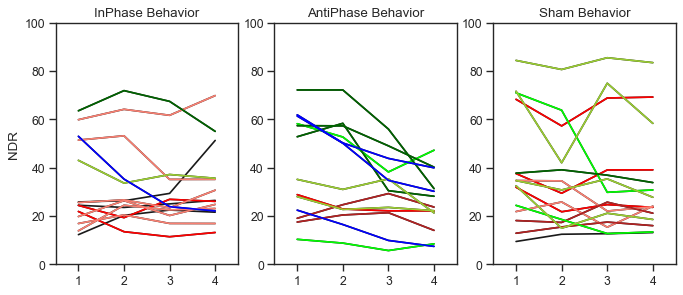

In [26]:
### Median Split DELTA NDR - 6 levels Learning x Group
df_med = pd.read_csv('Mixed_mod.txt', sep=r'\s', header=0, names = ['NDR', 'ZPAC', 'ORIENT', 'SUBJECT', 'GROUP', 'TIMEP'])
print(len(df_med))

orient = df_med.groupby(df_med['ORIENT']).groups
zero_index = orient[0].values
one_index = orient[1].values
df_med.drop(df_med.index[one_index], inplace= True)
df_med.drop(['ORIENT'], axis= 1, inplace= True)
df_med = df_med.reset_index(drop=True)
#print(df_med)

timep = df_med.groupby(df_med['TIMEP']).groups
group = df_med.groupby(df_med['GROUP']).groups

G1_Bsl = group[1].intersection(timep[0]).values
G1_ACS = group[1].intersection(timep[5]).values
G1_P10 = group[1].intersection(timep[10]).values
G1_P30 = group[1].intersection(timep[30]).values
G2_Bsl = group[2].intersection(timep[0]).values
G2_ACS = group[2].intersection(timep[5]).values
G2_P10 = group[2].intersection(timep[10]).values
G2_P30 = group[2].intersection(timep[30]).values
G5_Bsl = group[5].intersection(timep[0]).values
G5_ACS = group[5].intersection(timep[5]).values
G5_P10 = group[5].intersection(timep[10]).values
G5_P30 = group[5].intersection(timep[30]).values

G1_ACS_Bsl = (df.loc[G1_ACS]['NDR'] - df.loc[G1_Bsl]['NDR'].values).reset_index(drop=True)
G1_P10_ACS = (df.loc[G1_P10]['NDR'] - df.loc[G1_ACS]['NDR'].values).reset_index(drop=True)
G1_P30_P10 = (df.loc[G1_P30]['NDR'] - df.loc[G1_P10]['NDR'].values).reset_index(drop=True)
G2_ACS_Bsl = (df.loc[G2_ACS]['NDR'] - df.loc[G2_Bsl]['NDR'].values).reset_index(drop=True)
G2_P10_ACS = (df.loc[G2_P10]['NDR'] - df.loc[G2_ACS]['NDR'].values).reset_index(drop=True)
G2_P30_P10 = (df.loc[G2_P30]['NDR'] - df.loc[G2_P10]['NDR'].values).reset_index(drop=True) 
G5_ACS_Bsl = (df.loc[G5_ACS]['NDR'] - df.loc[G5_Bsl]['NDR'].values).reset_index(drop=True)
G5_P10_ACS = (df.loc[G5_P10]['NDR'] - df.loc[G5_ACS]['NDR'].values).reset_index(drop=True)
G5_P30_P10 = (df.loc[G5_P30]['NDR'] - df.loc[G5_P10]['NDR'].values).reset_index(drop=True)
#print(G1_P10_ACS)

All_ACS_Bsl = pd.concat([G1_ACS_Bsl, G2_ACS_Bsl, G5_ACS_Bsl])
All_ACS_Bsl = All_ACS_Bsl.reset_index(drop=True)

All_ACS_Bsl_thr = np.median(All_ACS_Bsl.values)
me = np.mean(All_ACS_Bsl.values)
print(All_ACS_Bsl_thr, me)

G1_ACS_Bsl_Le = np.where(G1_ACS_Bsl.values<=All_ACS_Bsl_thr)
G2_ACS_Bsl_Le = np.where(G2_ACS_Bsl.values<=All_ACS_Bsl_thr)
G5_ACS_Bsl_Le = np.where(G5_ACS_Bsl.values<=All_ACS_Bsl_thr)
G1_P10_ACS_Le = np.where(G1_P10_ACS.values<=All_ACS_Bsl_thr)
G2_P10_ACS_Le = np.where(G2_P10_ACS.values<=All_ACS_Bsl_thr)
G5_P10_ACS_Le = np.where(G5_P10_ACS.values<=All_ACS_Bsl_thr)
G1_P30_P10_Le = np.where(G1_P30_P10.values<=All_ACS_Bsl_thr)
G2_P30_P10_Le = np.where(G2_P30_P10.values<=All_ACS_Bsl_thr)
G5_P30_P10_Le = np.where(G5_P30_P10.values<=All_ACS_Bsl_thr)
print(G5_ACS_Bsl_Le,G5_P10_ACS_Le,G5_P30_P10_Le)
#       G2_ACS_Bsl_Le,G2_P10_ACS_Le,G2_P30_P10_Le,
#       G5_ACS_Bsl_Le,G5_P10_ACS_Le,G5_P30_P10_Le)

G1_0 = np.asarray([20 if number in G1_ACS_Bsl_Le[0] else 2 for number in range(14)])
G2_0 = np.asarray([10 if number in 14+G2_ACS_Bsl_Le[0] else 1 for number in range(14, 26+1)])
G5_0 = np.asarray([50 if number in 27+G5_ACS_Bsl_Le[0] else 5 for number in range(27, 41+1)])
G1_1 = np.asarray([20 if number in 42+G1_ACS_Bsl_Le[0] else 2 for number in range(42, 55+1)])
G2_1 = np.asarray([10 if number in 56+G2_ACS_Bsl_Le[0] else 1 for number in range(56, 68+1)])
G5_1 = np.asarray([50 if number in 69+G5_ACS_Bsl_Le[0] else 5 for number in range(69, 83+1)])
G1_2 = np.asarray([20 if number in 84+G1_P10_ACS_Le[0] else 2 for number in range(84, 97+1)])
G2_2 = np.asarray([10 if number in 98+G2_P10_ACS_Le[0] else 1 for number in range(98, 110+1)])
G5_2 = np.asarray([50 if number in 111+G5_P10_ACS_Le[0] else 5 for number in range(111, 125+1)])
G1_3 = np.asarray([20 if number in 126+G1_P30_P10_Le[0] else 2 for number in range(126, 139+1)])
G2_3 = np.asarray([10 if number in 140+G2_P30_P10_Le[0] else 1 for number in range(140, 152+1)])
G5_3 = np.asarray([50 if number in 153+G5_P30_P10_Le[0] else 5 for number in range(153, 167+1)])
#print(G1_0, G2_0, G5_0, G1_1, G2_1, G5_1, G1_2, G2_2, G5_2, G1_3, G2_3, G5_3)

plt.figure(figsize=(10, 4), dpi= 80)
plt.subplot(1,3,1)
plt.plot([1,2,3,4],[df_med.loc[G1_Bsl]['NDR'],df_med.loc[G1_ACS]['NDR'],df_med.loc[G1_P10]['NDR'],df_med.loc[G1_P30]['NDR']], c='k')
plt.plot([1,2,3,4],[df_med.loc[G1_Bsl]['NDR'][7],df_med.loc[G1_ACS]['NDR'][42+7],df_med.loc[G1_P10]['NDR'][84+7],df_med.loc[G1_P30]['NDR'][126+7]], c='red')
plt.plot([1,2,3,4],[df_med.loc[G1_Bsl]['NDR'][13],df_med.loc[G1_ACS]['NDR'][42+13],df_med.loc[G1_P10]['NDR'][84+13],df_med.loc[G1_P30]['NDR'][126+13]], c='red')
plt.plot([1,2,3,4],[df_med.loc[G1_Bsl]['NDR'][0],df_med.loc[G1_ACS]['NDR'][42+0],df_med.loc[G1_P10]['NDR'][84+0],df_med.loc[G1_P30]['NDR'][126+0]], c='salmon')
plt.plot([1,2,3,4],[df_med.loc[G1_Bsl]['NDR'][1],df_med.loc[G1_ACS]['NDR'][42+1],df_med.loc[G1_P10]['NDR'][84+1],df_med.loc[G1_P30]['NDR'][126+1]], c='salmon')
plt.plot([1,2,3,4],[df_med.loc[G1_Bsl]['NDR'][3],df_med.loc[G1_ACS]['NDR'][42+3],df_med.loc[G1_P10]['NDR'][84+3],df_med.loc[G1_P30]['NDR'][126+3]], c='salmon')
plt.plot([1,2,3,4],[df_med.loc[G1_Bsl]['NDR'][4],df_med.loc[G1_ACS]['NDR'][42+4],df_med.loc[G1_P10]['NDR'][84+4],df_med.loc[G1_P30]['NDR'][126+4]], c='salmon')
plt.plot([1,2,3,4],[df_med.loc[G1_Bsl]['NDR'][6],df_med.loc[G1_ACS]['NDR'][42+6],df_med.loc[G1_P10]['NDR'][84+6],df_med.loc[G1_P30]['NDR'][126+6]], c='salmon')
plt.plot([1,2,3,4],[df_med.loc[G1_Bsl]['NDR'][9],df_med.loc[G1_ACS]['NDR'][42+9],df_med.loc[G1_P10]['NDR'][84+9],df_med.loc[G1_P30]['NDR'][126+9]], c='salmon')
plt.plot([1,2,3,4],[df_med.loc[G1_Bsl]['NDR'][11],df_med.loc[G1_ACS]['NDR'][42+11],df_med.loc[G1_P10]['NDR'][84+11],df_med.loc[G1_P30]['NDR'][126+11]], c='darkgreen')
plt.plot([1,2,3,4],[df_med.loc[G1_Bsl]['NDR'][12],df_med.loc[G1_ACS]['NDR'][42+12],df_med.loc[G1_P10]['NDR'][84+12],df_med.loc[G1_P30]['NDR'][126+12]], c='yellowgreen')
plt.plot([1,2,3,4],[df_med.loc[G1_Bsl]['NDR'][10],df_med.loc[G1_ACS]['NDR'][42+10],df_med.loc[G1_P10]['NDR'][84+10],df_med.loc[G1_P30]['NDR'][126+10]], c='blue')
plt.title('InPhase Behavior')
plt.ylabel('NDR')
plt.ylim(0,100)
plt.xlim(0.5,4.5)
plt.subplot(1,3,2)
plt.plot([1,2,3,4],[df.loc[G2_Bsl]['NDR'],df.loc[G2_ACS]['NDR'],df.loc[G2_P10]['NDR'],df.loc[G2_P30]['NDR']], c='k')
plt.plot([1,2,3,4],[df_med.loc[G2_Bsl]['NDR'][14+2],df_med.loc[G2_ACS]['NDR'][56+2],df_med.loc[G2_P10]['NDR'][98+2],df_med.loc[G2_P30]['NDR'][140+2]], c='red')
plt.plot([1,2,3,4],[df_med.loc[G2_Bsl]['NDR'][14+3],df_med.loc[G2_ACS]['NDR'][56+3],df_med.loc[G2_P10]['NDR'][98+3],df_med.loc[G2_P30]['NDR'][140+3]], c='firebrick')
plt.plot([1,2,3,4],[df_med.loc[G2_Bsl]['NDR'][14+4],df_med.loc[G2_ACS]['NDR'][56+4],df_med.loc[G2_P10]['NDR'][98+4],df_med.loc[G2_P30]['NDR'][140+4]], c='firebrick')
plt.plot([1,2,3,4],[df_med.loc[G2_Bsl]['NDR'][14+6],df_med.loc[G2_ACS]['NDR'][56+6],df_med.loc[G2_P10]['NDR'][98+6],df_med.loc[G2_P30]['NDR'][140+6]], c='lime')
plt.plot([1,2,3,4],[df_med.loc[G2_Bsl]['NDR'][14+7],df_med.loc[G2_ACS]['NDR'][56+7],df_med.loc[G2_P10]['NDR'][98+7],df_med.loc[G2_P30]['NDR'][140+7]], c='lime')
plt.plot([1,2,3,4],[df_med.loc[G2_Bsl]['NDR'][14+8],df_med.loc[G2_ACS]['NDR'][56+8],df_med.loc[G2_P10]['NDR'][98+8],df_med.loc[G2_P30]['NDR'][140+8]], c='darkgreen')
plt.plot([1,2,3,4],[df_med.loc[G2_Bsl]['NDR'][14+5],df_med.loc[G2_ACS]['NDR'][56+5],df_med.loc[G2_P10]['NDR'][98+5],df_med.loc[G2_P30]['NDR'][140+5]], c='darkgreen')
plt.plot([1,2,3,4],[df_med.loc[G2_Bsl]['NDR'][14+10],df_med.loc[G2_ACS]['NDR'][56+10],df_med.loc[G2_P10]['NDR'][98+10],df_med.loc[G2_P30]['NDR'][140+10]], c='darkgreen')
plt.plot([1,2,3,4],[df_med.loc[G2_Bsl]['NDR'][14+11],df_med.loc[G2_ACS]['NDR'][56+11],df_med.loc[G2_P10]['NDR'][98+11],df_med.loc[G2_P30]['NDR'][140+11]], c='yellowgreen')
plt.plot([1,2,3,4],[df_med.loc[G2_Bsl]['NDR'][14+12],df_med.loc[G2_ACS]['NDR'][56+12],df_med.loc[G2_P10]['NDR'][98+12],df_med.loc[G2_P30]['NDR'][140+12]], c='yellowgreen')
plt.plot([1,2,3,4],[df_med.loc[G2_Bsl]['NDR'][14+0],df_med.loc[G2_ACS]['NDR'][56+0],df_med.loc[G2_P10]['NDR'][98+0],df_med.loc[G2_P30]['NDR'][140+0]], c='blue')
plt.plot([1,2,3,4],[df_med.loc[G2_Bsl]['NDR'][14+1],df_med.loc[G2_ACS]['NDR'][56+1],df_med.loc[G2_P10]['NDR'][98+1],df_med.loc[G2_P30]['NDR'][140+1]], c='blue')
plt.plot([1,2,3,4],[df_med.loc[G2_Bsl]['NDR'][14+9],df_med.loc[G2_ACS]['NDR'][56+9],df_med.loc[G2_P10]['NDR'][98+9],df_med.loc[G2_P30]['NDR'][140+9]], c='blue')
plt.title('AntiPhase Behavior')
plt.ylim(0,100)
plt.xlim(0.5,4.5)
plt.subplot(1,3,3)
plt.plot([1,2,3,4],[df.loc[G5_Bsl]['NDR'],df.loc[G5_ACS]['NDR'],df.loc[G5_P10]['NDR'],df.loc[G5_P30]['NDR']], c='k')
plt.plot([1,2,3,4],[df_med.loc[G5_Bsl]['NDR'][27+2],df_med.loc[G5_ACS]['NDR'][69+2],df_med.loc[G5_P10]['NDR'][111+2],df_med.loc[G5_P30]['NDR'][153+2]], c='red')
plt.plot([1,2,3,4],[df_med.loc[G5_Bsl]['NDR'][27+8],df_med.loc[G5_ACS]['NDR'][69+8],df_med.loc[G5_P10]['NDR'][111+8],df_med.loc[G5_P30]['NDR'][153+8]], c='red')
plt.plot([1,2,3,4],[df_med.loc[G5_Bsl]['NDR'][27+10],df_med.loc[G5_ACS]['NDR'][69+10],df_med.loc[G5_P10]['NDR'][111+10],df_med.loc[G5_P30]['NDR'][153+10]], c='red')
plt.plot([1,2,3,4],[df_med.loc[G5_Bsl]['NDR'][27+0],df_med.loc[G5_ACS]['NDR'][69+0],df_med.loc[G5_P10]['NDR'][111+0],df_med.loc[G5_P30]['NDR'][153+0]], c='salmon')
plt.plot([1,2,3,4],[df_med.loc[G5_Bsl]['NDR'][27+11],df_med.loc[G5_ACS]['NDR'][69+11],df_med.loc[G5_P10]['NDR'][111+11],df_med.loc[G5_P30]['NDR'][153+11]], c='salmon')
plt.plot([1,2,3,4],[df_med.loc[G5_Bsl]['NDR'][27+5],df_med.loc[G5_ACS]['NDR'][69+5],df_med.loc[G5_P10]['NDR'][111+5],df_med.loc[G5_P30]['NDR'][153+5]], c='firebrick')
plt.plot([1,2,3,4],[df_med.loc[G5_Bsl]['NDR'][27+6],df_med.loc[G5_ACS]['NDR'][69+6],df_med.loc[G5_P10]['NDR'][111+6],df_med.loc[G5_P30]['NDR'][153+6]], c='firebrick')
plt.plot([1,2,3,4],[df_med.loc[G5_Bsl]['NDR'][27+1],df_med.loc[G5_ACS]['NDR'][69+1],df_med.loc[G5_P10]['NDR'][111+1],df_med.loc[G5_P30]['NDR'][153+1]], c='lime')
plt.plot([1,2,3,4],[df_med.loc[G5_Bsl]['NDR'][27+12],df_med.loc[G5_ACS]['NDR'][69+12],df_med.loc[G5_P10]['NDR'][111+12],df_med.loc[G5_P30]['NDR'][153+12]], c='lime')
plt.plot([1,2,3,4],[df_med.loc[G5_Bsl]['NDR'][27+7],df_med.loc[G5_ACS]['NDR'][69+7],df_med.loc[G5_P10]['NDR'][111+7],df_med.loc[G5_P30]['NDR'][153+7]], c='darkgreen')
plt.plot([1,2,3,4],[df_med.loc[G5_Bsl]['NDR'][27+3],df_med.loc[G5_ACS]['NDR'][69+3],df_med.loc[G5_P10]['NDR'][111+3],df_med.loc[G5_P30]['NDR'][153+3]], c='yellowgreen')
plt.plot([1,2,3,4],[df_med.loc[G5_Bsl]['NDR'][27+9],df_med.loc[G5_ACS]['NDR'][69+9],df_med.loc[G5_P10]['NDR'][111+9],df_med.loc[G5_P30]['NDR'][153+9]], c='yellowgreen')
plt.plot([1,2,3,4],[df_med.loc[G5_Bsl]['NDR'][27+13],df_med.loc[G5_ACS]['NDR'][69+13],df_med.loc[G5_P10]['NDR'][111+13],df_med.loc[G5_P30]['NDR'][153+13]], c='yellowgreen')
plt.plot([1,2,3,4],[df_med.loc[G5_Bsl]['NDR'][27+14],df_med.loc[G5_ACS]['NDR'][69+14],df_med.loc[G5_P10]['NDR'][111+14],df_med.loc[G5_P30]['NDR'][153+14]], c='yellowgreen')
plt.title('Sham Behavior')
plt.ylim(0,100)
plt.xlim(0.5,4.5)


All_Learn = np.concatenate([G1_0, G2_0, G5_0, G1_1, G2_1, G5_1,
                           G1_2, G2_2, G5_2, G1_3, G2_3, G5_3])
print(len(All_Learn))

gr_le = pd.DataFrame(All_Learn, columns=['GxL'])
gr_le = gr_le.reset_index(drop=True)

df_gr_le = pd.concat([df_med, gr_le], axis=1)
df_gr_le.drop('GROUP', axis= 1, inplace= True)
df_gr_le.reset_index(drop=True)
print(df_gr_le)

In [20]:
model_1 = sm.MixedLM.from_formula('NDR ~ C(TIMEP)+C(GxL)', df_gr_le,
                                groups=df_gr_le['SUBJECT'], missing='drop')
result_1 = model_1.fit(method='lbfgs')
print(result_1.summary())

model_2 = sm.MixedLM.from_formula('NDR ~ C(TIMEP)+C(GxL)+ZPAC', df_gr_le,
                                groups=df_gr_le['SUBJECT'], missing='drop')
result_2 = model_2.fit(method='lbfgs')
print(result_2.summary())

model_3 = sm.MixedLM.from_formula('NDR ~ C(TIMEP)+C(GxL)*ZPAC', df_gr_le,
                                groups=df_gr_le['SUBJECT'], missing='drop')
result_3 = model_3.fit(method='lbfgs')
print(result_3.summary())


           Mixed Linear Model Regression Results
Model:              MixedLM  Dependent Variable:  NDR      
No. Observations:   168      Method:              REML     
No. Groups:         42       Scale:               54.7900  
Min. group size:    4        Likelihood:          -620.1070
Max. group size:    4        Converged:           Yes      
Mean group size:    4.0                                    
-----------------------------------------------------------
                Coef.  Std.Err.   z    P>|z|  [0.025 0.975]
-----------------------------------------------------------
Intercept       42.282    5.376  7.865 0.000  31.746 52.819
C(TIMEP)[T.5]   -2.882    1.615 -1.784 0.074  -6.048  0.284
C(TIMEP)[T.10]  -5.332    1.661 -3.211 0.001  -8.587 -2.077
C(TIMEP)[T.30]  -6.651    1.624 -4.094 0.000  -9.834 -3.467
C(GxL)[T.2]     -5.731    7.240 -0.792 0.429 -19.921  8.460
C(GxL)[T.5]     -2.175    7.150 -0.304 0.761 -16.188 11.839
C(GxL)[T.10]    -7.464    2.530 -2.950 0.003 -12.42

/home/robertofelipe_sg/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


336
168
-1.2347234999999994
(array([ 7, 10, 12, 13]),) (array([ 0,  1,  2,  6,  7,  9, 11, 12]),) (array([ 1,  2,  3,  8,  9, 10, 12, 13, 14]),) (array([], dtype=int64),) (array([], dtype=int64),) (array([], dtype=int64),)
-6.265284999999999
(array([ 0,  7, 10, 11, 12]),) (array([ 0,  1,  2,  5,  7,  8,  9, 10, 11]),) (array([ 0,  1,  9, 10, 12, 13, 14]),) (array([], dtype=int64),) (array([], dtype=int64),) (array([], dtype=int64),)


(0.5, 4.5)

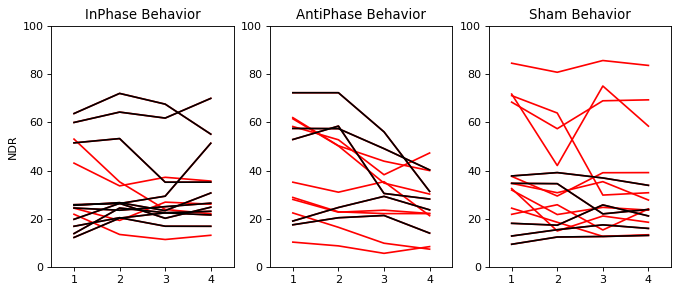

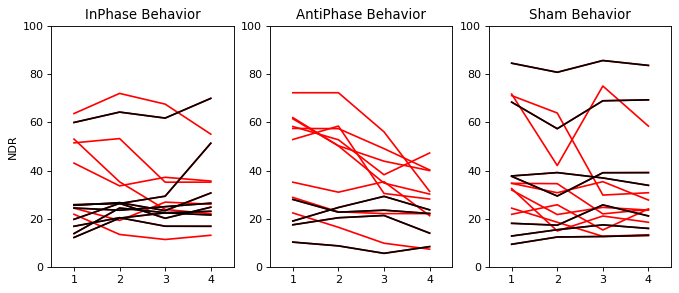

In [33]:
### Median Split DELTA NDR - Split @ Specific timepoint NO comparison with the other timepoints
df_basic = pd.read_csv('Mixed_mod.txt', sep=r'\s', header=0, names = ['NDR', 'ZPAC', 'ORIENT', 'SUBJECT', 'GROUP', 'TIMEP'])
print(len(df_basic))

orient = df_basic.groupby(df_basic['ORIENT']).groups
zero_index = orient[0].values
one_index = orient[1].values
df_basic.drop(df_basic.index[zero_index], inplace= True)
df_basic.drop(['ORIENT'], axis= 1, inplace= True)
df_basic = df_basic.reset_index(drop=True)
print(len(df_basic))

timep = df_basic.groupby(df_basic['TIMEP']).groups
group = df_basic.groupby(df_basic['GROUP']).groups

G1_Bsl = group[1].intersection(timep[0]).values
G1_ACS = group[1].intersection(timep[5]).values
G1_P10 = group[1].intersection(timep[10]).values
G1_P30 = group[1].intersection(timep[30]).values
G2_Bsl = group[2].intersection(timep[0]).values
G2_ACS = group[2].intersection(timep[5]).values
G2_P10 = group[2].intersection(timep[10]).values
G2_P30 = group[2].intersection(timep[30]).values
G5_Bsl = group[5].intersection(timep[0]).values
G5_ACS = group[5].intersection(timep[5]).values
G5_P10 = group[5].intersection(timep[10]).values
G5_P30 = group[5].intersection(timep[30]).values

G1_ACS_Bsl = (df.loc[G1_ACS]['NDR'] - df.loc[G1_Bsl]['NDR'].values).reset_index(drop=True)
G1_P10_ACS = (df.loc[G1_P10]['NDR'] - df.loc[G1_ACS]['NDR'].values).reset_index(drop=True)
G1_P30_P10 = (df.loc[G1_P30]['NDR'] - df.loc[G1_P10]['NDR'].values).reset_index(drop=True)
G2_ACS_Bsl = (df.loc[G2_ACS]['NDR'] - df.loc[G2_Bsl]['NDR'].values).reset_index(drop=True)
G2_P10_ACS = (df.loc[G2_P10]['NDR'] - df.loc[G2_ACS]['NDR'].values).reset_index(drop=True)
G2_P30_P10 = (df.loc[G2_P30]['NDR'] - df.loc[G2_P10]['NDR'].values).reset_index(drop=True) 
G5_ACS_Bsl = (df.loc[G5_ACS]['NDR'] - df.loc[G5_Bsl]['NDR'].values).reset_index(drop=True)
G5_P10_ACS = (df.loc[G5_P10]['NDR'] - df.loc[G5_ACS]['NDR'].values).reset_index(drop=True)
G5_P30_P10 = (df.loc[G5_P30]['NDR'] - df.loc[G5_P10]['NDR'].values).reset_index(drop=True)

G1_P30_Bsl = (df.loc[G1_P30]['NDR'] - df.loc[G1_Bsl]['NDR'].values).reset_index(drop=True)
G2_P30_Bsl = (df.loc[G2_P30]['NDR'] - df.loc[G2_Bsl]['NDR'].values).reset_index(drop=True)
G5_P30_Bsl = (df.loc[G5_P30]['NDR'] - df.loc[G5_Bsl]['NDR'].values).reset_index(drop=True)
#print(G1_P10_ACS)

All_ACS_Bsl = pd.concat([G1_ACS_Bsl, G2_ACS_Bsl, G5_ACS_Bsl])
All_ACS_Bsl = All_ACS_Bsl.reset_index(drop=True)
All_ACS_Bsl_thr = np.median(All_ACS_Bsl.values)
print(All_ACS_Bsl_thr)

G1_ACS_Bsl_Le = np.where(G1_ACS_Bsl.values<All_ACS_Bsl_thr)
G2_ACS_Bsl_Le = np.where(G2_ACS_Bsl.values<All_ACS_Bsl_thr)
G5_ACS_Bsl_Le = np.where(G5_ACS_Bsl.values<All_ACS_Bsl_thr)
G1_ACS_Bsl_E = np.where(G1_ACS_Bsl.values==All_ACS_Bsl_thr)
G2_ACS_Bsl_E = np.where(G2_ACS_Bsl.values==All_ACS_Bsl_thr)
G5_ACS_Bsl_E = np.where(G5_ACS_Bsl.values==All_ACS_Bsl_thr)
print(G1_ACS_Bsl_Le, G2_ACS_Bsl_Le, G5_ACS_Bsl_Le,
     G1_ACS_Bsl_E, G2_ACS_Bsl_E, G5_ACS_Bsl_E)

All_P30_Bsl = pd.concat([G1_P30_Bsl, G2_P30_Bsl, G5_P30_Bsl])
All_P30_Bsl = All_P30_Bsl.reset_index(drop=True)
All_P30_Bsl_thr = np.median(All_P30_Bsl.values)
print(All_P30_Bsl_thr)

G1_P30_Bsl_Le = np.where(G1_P30_Bsl.values<All_P30_Bsl_thr)
G2_P30_Bsl_Le = np.where(G2_P30_Bsl.values<All_P30_Bsl_thr)
G5_P30_Bsl_Le = np.where(G5_P30_Bsl.values<All_P30_Bsl_thr)
G1_P30_Bsl_E = np.where(G1_P30_Bsl.values==All_P30_Bsl_thr)
G2_P30_Bsl_E = np.where(G2_P30_Bsl.values==All_P30_Bsl_thr)
G5_P30_Bsl_E = np.where(G5_P30_Bsl.values==All_P30_Bsl_thr)
print(G1_P30_Bsl_Le, G2_P30_Bsl_Le, G5_P30_Bsl_Le,
     G1_P30_Bsl_E, G2_P30_Bsl_E, G5_P30_Bsl_E)

plt.figure(figsize=(10, 4), dpi= 80)
plt.subplot(1,3,1)
plt.plot([1,2,3,4],[df_basic.loc[G1_Bsl]['NDR'],df_basic.loc[G1_ACS]['NDR'],df_basic.loc[G1_P10]['NDR'],df_basic.loc[G1_P30]['NDR']], c='red')
plt.plot([1,2,3,4],[df_basic.loc[G1_Bsl]['NDR'][0],df_basic.loc[G1_ACS]['NDR'][42+0],df_basic.loc[G1_P10]['NDR'][84+0],df_basic.loc[G1_P30]['NDR'][126+0]], c='k')
plt.plot([1,2,3,4],[df_basic.loc[G1_Bsl]['NDR'][1],df_basic.loc[G1_ACS]['NDR'][42+1],df_basic.loc[G1_P10]['NDR'][84+1],df_basic.loc[G1_P30]['NDR'][126+1]], c='k')
plt.plot([1,2,3,4],[df_basic.loc[G1_Bsl]['NDR'][2],df_basic.loc[G1_ACS]['NDR'][42+2],df_basic.loc[G1_P10]['NDR'][84+2],df_basic.loc[G1_P30]['NDR'][126+2]], c='k')
plt.plot([1,2,3,4],[df_basic.loc[G1_Bsl]['NDR'][3],df_basic.loc[G1_ACS]['NDR'][42+3],df_basic.loc[G1_P10]['NDR'][84+3],df_basic.loc[G1_P30]['NDR'][126+3]], c='k')
plt.plot([1,2,3,4],[df_basic.loc[G1_Bsl]['NDR'][4],df_basic.loc[G1_ACS]['NDR'][42+4],df_basic.loc[G1_P10]['NDR'][84+4],df_basic.loc[G1_P30]['NDR'][126+4]], c='k')
plt.plot([1,2,3,4],[df_basic.loc[G1_Bsl]['NDR'][5],df_basic.loc[G1_ACS]['NDR'][42+5],df_basic.loc[G1_P10]['NDR'][84+5],df_basic.loc[G1_P30]['NDR'][126+5]], c='k')
plt.plot([1,2,3,4],[df_basic.loc[G1_Bsl]['NDR'][6],df_basic.loc[G1_ACS]['NDR'][42+6],df_basic.loc[G1_P10]['NDR'][84+6],df_basic.loc[G1_P30]['NDR'][126+6]], c='k')
plt.plot([1,2,3,4],[df_basic.loc[G1_Bsl]['NDR'][8],df_basic.loc[G1_ACS]['NDR'][42+8],df_basic.loc[G1_P10]['NDR'][84+8],df_basic.loc[G1_P30]['NDR'][126+8]], c='k')
plt.plot([1,2,3,4],[df_basic.loc[G1_Bsl]['NDR'][9],df_basic.loc[G1_ACS]['NDR'][42+9],df_basic.loc[G1_P10]['NDR'][84+9],df_basic.loc[G1_P30]['NDR'][126+9]], c='k')
plt.plot([1,2,3,4],[df_basic.loc[G1_Bsl]['NDR'][11],df_basic.loc[G1_ACS]['NDR'][42+11],df_basic.loc[G1_P10]['NDR'][84+11],df_basic.loc[G1_P30]['NDR'][126+11]], c='k')
plt.title('InPhase Behavior')
plt.ylabel('NDR')
plt.ylim(0,100)
plt.xlim(0.5,4.5)
plt.subplot(1,3,2)
plt.plot([1,2,3,4],[df.loc[G2_Bsl]['NDR'],df.loc[G2_ACS]['NDR'],df.loc[G2_P10]['NDR'],df.loc[G2_P30]['NDR']], c='red')
plt.plot([1,2,3,4],[df_basic.loc[G2_Bsl]['NDR'][14+3],df_basic.loc[G2_ACS]['NDR'][56+3],df_basic.loc[G2_P10]['NDR'][98+3],df_basic.loc[G2_P30]['NDR'][140+3]], c='k')
plt.plot([1,2,3,4],[df_basic.loc[G2_Bsl]['NDR'][14+4],df_basic.loc[G2_ACS]['NDR'][56+4],df_basic.loc[G2_P10]['NDR'][98+4],df_basic.loc[G2_P30]['NDR'][140+4]], c='k')
plt.plot([1,2,3,4],[df_basic.loc[G2_Bsl]['NDR'][14+5],df_basic.loc[G2_ACS]['NDR'][56+5],df_basic.loc[G2_P10]['NDR'][98+5],df_basic.loc[G2_P30]['NDR'][140+5]], c='k')
plt.plot([1,2,3,4],[df_basic.loc[G2_Bsl]['NDR'][14+8],df_basic.loc[G2_ACS]['NDR'][56+8],df_basic.loc[G2_P10]['NDR'][98+8],df_basic.loc[G2_P30]['NDR'][140+8]], c='k')
plt.plot([1,2,3,4],[df_basic.loc[G2_Bsl]['NDR'][14+10],df_basic.loc[G2_ACS]['NDR'][56+10],df_basic.loc[G2_P10]['NDR'][98+10],df_basic.loc[G2_P30]['NDR'][140+10]], c='k')
plt.title('AntiPhase Behavior')
plt.ylim(0,100)
plt.xlim(0.5,4.5)
plt.subplot(1,3,3)
plt.plot([1,2,3,4],[df.loc[G5_Bsl]['NDR'],df.loc[G5_ACS]['NDR'],df.loc[G5_P10]['NDR'],df.loc[G5_P30]['NDR']], c='red')
plt.plot([1,2,3,4],[df_basic.loc[G5_Bsl]['NDR'][27+0],df_basic.loc[G5_ACS]['NDR'][69+0],df_basic.loc[G5_P10]['NDR'][111+0],df_basic.loc[G5_P30]['NDR'][153+0]], c='k')
plt.plot([1,2,3,4],[df_basic.loc[G5_Bsl]['NDR'][27+4],df_basic.loc[G5_ACS]['NDR'][69+4],df_basic.loc[G5_P10]['NDR'][111+4],df_basic.loc[G5_P30]['NDR'][153+4]], c='k')
plt.plot([1,2,3,4],[df_basic.loc[G5_Bsl]['NDR'][27+5],df_basic.loc[G5_ACS]['NDR'][69+5],df_basic.loc[G5_P10]['NDR'][111+5],df_basic.loc[G5_P30]['NDR'][153+5]], c='k')
plt.plot([1,2,3,4],[df_basic.loc[G5_Bsl]['NDR'][27+6],df_basic.loc[G5_ACS]['NDR'][69+6],df_basic.loc[G5_P10]['NDR'][111+6],df_basic.loc[G5_P30]['NDR'][153+6]], c='k')
plt.plot([1,2,3,4],[df_basic.loc[G5_Bsl]['NDR'][27+7],df_basic.loc[G5_ACS]['NDR'][69+7],df_basic.loc[G5_P10]['NDR'][111+7],df_basic.loc[G5_P30]['NDR'][153+7]], c='k')
plt.title('Sham Behavior')
plt.ylim(0,100)
plt.xlim(0.5,4.5)

plt.figure(figsize=(10, 4), dpi= 80)
plt.subplot(1,3,1)
plt.plot([1,2,3,4],[df_basic.loc[G1_Bsl]['NDR'],df_basic.loc[G1_ACS]['NDR'],df_basic.loc[G1_P10]['NDR'],df_basic.loc[G1_P30]['NDR']], c='r')
plt.plot([1,2,3,4],[df_basic.loc[G1_Bsl]['NDR'][1],df_basic.loc[G1_ACS]['NDR'][42+1],df_basic.loc[G1_P10]['NDR'][84+1],df_basic.loc[G1_P30]['NDR'][126+1]], c='k')
plt.plot([1,2,3,4],[df_basic.loc[G1_Bsl]['NDR'][2],df_basic.loc[G1_ACS]['NDR'][42+2],df_basic.loc[G1_P10]['NDR'][84+2],df_basic.loc[G1_P30]['NDR'][126+2]], c='k')
plt.plot([1,2,3,4],[df_basic.loc[G1_Bsl]['NDR'][3],df_basic.loc[G1_ACS]['NDR'][42+3],df_basic.loc[G1_P10]['NDR'][84+3],df_basic.loc[G1_P30]['NDR'][126+3]], c='k')
plt.plot([1,2,3,4],[df_basic.loc[G1_Bsl]['NDR'][4],df_basic.loc[G1_ACS]['NDR'][42+4],df_basic.loc[G1_P10]['NDR'][84+4],df_basic.loc[G1_P30]['NDR'][126+4]], c='k')
plt.plot([1,2,3,4],[df_basic.loc[G1_Bsl]['NDR'][5],df_basic.loc[G1_ACS]['NDR'][42+5],df_basic.loc[G1_P10]['NDR'][84+5],df_basic.loc[G1_P30]['NDR'][126+5]], c='k')
plt.plot([1,2,3,4],[df_basic.loc[G1_Bsl]['NDR'][6],df_basic.loc[G1_ACS]['NDR'][42+6],df_basic.loc[G1_P10]['NDR'][84+6],df_basic.loc[G1_P30]['NDR'][126+6]], c='k')
plt.plot([1,2,3,4],[df_basic.loc[G1_Bsl]['NDR'][8],df_basic.loc[G1_ACS]['NDR'][42+8],df_basic.loc[G1_P10]['NDR'][84+8],df_basic.loc[G1_P30]['NDR'][126+8]], c='k')
plt.plot([1,2,3,4],[df_basic.loc[G1_Bsl]['NDR'][9],df_basic.loc[G1_ACS]['NDR'][42+9],df_basic.loc[G1_P10]['NDR'][84+9],df_basic.loc[G1_P30]['NDR'][126+9]], c='k')
plt.title('InPhase Behavior')
plt.ylabel('NDR')
plt.ylim(0,100)
plt.xlim(0.5,4.5)
plt.subplot(1,3,2)
plt.plot([1,2,3,4],[df.loc[G2_Bsl]['NDR'],df.loc[G2_ACS]['NDR'],df.loc[G2_P10]['NDR'],df.loc[G2_P30]['NDR']], c='r')
plt.plot([1,2,3,4],[df_basic.loc[G2_Bsl]['NDR'][14+3],df_basic.loc[G2_ACS]['NDR'][56+3],df_basic.loc[G2_P10]['NDR'][98+3],df_basic.loc[G2_P30]['NDR'][140+3]], c='k')
plt.plot([1,2,3,4],[df_basic.loc[G2_Bsl]['NDR'][14+4],df_basic.loc[G2_ACS]['NDR'][56+4],df_basic.loc[G2_P10]['NDR'][98+4],df_basic.loc[G2_P30]['NDR'][140+4]], c='k')
plt.plot([1,2,3,4],[df_basic.loc[G2_Bsl]['NDR'][14+6],df_basic.loc[G2_ACS]['NDR'][56+6],df_basic.loc[G2_P10]['NDR'][98+6],df_basic.loc[G2_P30]['NDR'][140+6]], c='k')
plt.plot([1,2,3,4],[df_basic.loc[G2_Bsl]['NDR'][14+12],df_basic.loc[G2_ACS]['NDR'][56+12],df_basic.loc[G2_P10]['NDR'][98+12],df_basic.loc[G2_P30]['NDR'][140+12]], c='k')
plt.title('AntiPhase Behavior')
plt.ylim(0,100)
plt.xlim(0.5,4.5)
plt.subplot(1,3,3)
plt.plot([1,2,3,4],[df.loc[G5_Bsl]['NDR'],df.loc[G5_ACS]['NDR'],df.loc[G5_P10]['NDR'],df.loc[G5_P30]['NDR']], c='r')
plt.plot([1,2,3,4],[df_basic.loc[G5_Bsl]['NDR'][27+2],df_basic.loc[G5_ACS]['NDR'][69+2],df_basic.loc[G5_P10]['NDR'][111+2],df_basic.loc[G5_P30]['NDR'][153+2]], c='k')
plt.plot([1,2,3,4],[df_basic.loc[G5_Bsl]['NDR'][27+3],df_basic.loc[G5_ACS]['NDR'][69+3],df_basic.loc[G5_P10]['NDR'][111+3],df_basic.loc[G5_P30]['NDR'][153+3]], c='k')
plt.plot([1,2,3,4],[df_basic.loc[G5_Bsl]['NDR'][27+4],df_basic.loc[G5_ACS]['NDR'][69+4],df_basic.loc[G5_P10]['NDR'][111+4],df_basic.loc[G5_P30]['NDR'][153+4]], c='k')
plt.plot([1,2,3,4],[df_basic.loc[G5_Bsl]['NDR'][27+5],df_basic.loc[G5_ACS]['NDR'][69+5],df_basic.loc[G5_P10]['NDR'][111+5],df_basic.loc[G5_P30]['NDR'][153+5]], c='k')
plt.plot([1,2,3,4],[df_basic.loc[G5_Bsl]['NDR'][27+6],df_basic.loc[G5_ACS]['NDR'][69+6],df_basic.loc[G5_P10]['NDR'][111+6],df_basic.loc[G5_P30]['NDR'][153+6]], c='k')
plt.plot([1,2,3,4],[df_basic.loc[G5_Bsl]['NDR'][27+7],df_basic.loc[G5_ACS]['NDR'][69+7],df_basic.loc[G5_P10]['NDR'][111+7],df_basic.loc[G5_P30]['NDR'][153+7]], c='k')
plt.plot([1,2,3,4],[df_basic.loc[G5_Bsl]['NDR'][27+8],df_basic.loc[G5_ACS]['NDR'][69+8],df_basic.loc[G5_P10]['NDR'][111+8],df_basic.loc[G5_P30]['NDR'][153+8]], c='k')
plt.title('Sham Behavior')
plt.ylim(0,100)
plt.xlim(0.5,4.5)

In [4]:
# Binary Learning classification TACS-BSL
G1_ACS_Bsl_idx = [1 if number in G1_ACS_Bsl_Le[0] else 0 for number in range(14)]
G2_ACS_Bsl_idx = [1 if number in 14+G2_ACS_Bsl_Le[0] else 0 for number in range(14, 26+1)]
G5_ACS_Bsl_idx = [1 if number in 27+G5_ACS_Bsl_Le[0] else 0 for number in range(27, 41+1)]
print(G1_ACS_Bsl_idx, G2_ACS_Bsl_idx, G5_ACS_Bsl_idx)
All_ACS_Bsl_idx = G1_ACS_Bsl_idx+G2_ACS_Bsl_idx+G5_ACS_Bsl_idx+G1_ACS_Bsl_idx+G2_ACS_Bsl_idx+G5_ACS_Bsl_idx+G1_ACS_Bsl_idx+G2_ACS_Bsl_idx+G5_ACS_Bsl_idx+G1_ACS_Bsl_idx+G2_ACS_Bsl_idx+G5_ACS_Bsl_idx
print(len(All_ACS_Bsl_idx))

df_bin_ACS_Bsl = pd.DataFrame(All_ACS_Bsl_idx, columns=['Bin_Le'])
df_bin_ACS_Bsl = df_bin_ACS_Bsl.reset_index(drop=True)

df_basic_ACS_Bsl = pd.concat([df_basic, df_bin_ACS_Bsl], axis=1)
df_basic_ACS_Bsl.reset_index(drop=True)
#print(df_basic_ACS_Bsl)

model = sm.MixedLM.from_formula('NDR ~ C(TIMEP)+C(GROUP)*C(Bin_Le)', df_basic_ACS_Bsl,
                                groups=df_basic_ACS_Bsl['SUBJECT'])#, missing='drop')
result = model.fit(method='lbfgs')
print(result.summary())

### Zpac DOES NOT explain Learning by itself
### Interaction of GROUP X Learning
### Significant difference between Sham Learners B:-27.322 P:0.044 and InPhase Non Learners @tACS Int:28.465

[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1] [1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1] [0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1]
168
                  Mixed Linear Model Regression Results
Model:                  MixedLM       Dependent Variable:       NDR      
No. Observations:       168           Method:                   REML     
No. Groups:             42            Scale:                    58.6292  
Min. group size:        4             Log-Likelihood:           -617.9533
Max. group size:        4             Converged:                Yes      
Mean group size:        4.0                                              
-------------------------------------------------------------------------
                              Coef.  Std.Err.   z    P>|z|  [0.025 0.975]
-------------------------------------------------------------------------
Intercept                     37.575    5.510  6.819 0.000  26.775 48.374
C(TIMEP)[T.5]                 -2.882    1.671 -1.725 0.085  -6.157  0.3

In [28]:
# Binary Learning classification P30-BSL
G1_P30_Bsl_idx = [0 if number in G1_P30_Bsl_Le[0] else 1 for number in range(14)]
G2_P30_Bsl_idx = [0 if number in 14+G2_P30_Bsl_Le[0] else 1 for number in range(14, 26+1)]
G5_P30_Bsl_idx = [0 if number in 27+G5_P30_Bsl_Le[0] else 1 for number in range(27, 41+1)]
print(G1_P30_Bsl_idx, G2_P30_Bsl_idx, G5_P30_Bsl_idx)
All_P30_Bsl_idx = G1_P30_Bsl_idx+G2_P30_Bsl_idx+G5_P30_Bsl_idx+G1_P30_Bsl_idx+G2_P30_Bsl_idx+G5_P30_Bsl_idx+G1_P30_Bsl_idx+G2_P30_Bsl_idx+G5_P30_Bsl_idx+G1_P30_Bsl_idx+G2_P30_Bsl_idx+G5_P30_Bsl_idx
print(len(All_P30_Bsl_idx))

df_bin_P30_Bsl = pd.DataFrame(All_P30_Bsl_idx, columns=['Bin_Le'])
df_bin_P30_Bsl = df_bin_P30_Bsl.reset_index(drop=True)

df_basic_P30_Bsl = pd.concat([df_basic, df_bin_P30_Bsl], axis=1)
df_basic_P30_Bsl.reset_index(drop=True)
#print(df_basic_P30_Bsl)

model = sm.MixedLM.from_formula('NDR ~ C(TIMEP)+C(Bin_Le)*C(GROUP)', df_basic_P30_Bsl,
                                groups=df_basic_P30_Bsl['SUBJECT'], missing='drop')
result = model.fit(method='lbfgs')
print(result.summary())

### Zpac DOES NOT explain Learning by itself
### Interaction of GROUP X Learning
### Significant difference between AntiPhase Non Learners B:29.235 P:0.036 and Sham Learners @P30 Int:35.298 

[0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1] [0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1] [0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0]
168
                  Mixed Linear Model Regression Results
Model:                  MixedLM       Dependent Variable:       NDR      
No. Observations:       168           Method:                   REML     
No. Groups:             42            Scale:                    58.6294  
Min. group size:        4             Likelihood:               -618.3990
Max. group size:        4             Converged:                Yes      
Mean group size:        4.0                                              
-------------------------------------------------------------------------
                              Coef.  Std.Err.   z    P>|z|  [0.025 0.975]
-------------------------------------------------------------------------
Intercept                     42.655    7.814  5.458 0.000  27.339 57.971
C(TIMEP)[T.5]                 -2.882    1.671 -1.725 0.085  -6.157  0.3

In [32]:
# 6 Levels Learning classification tACS-Bsl
G1_ACS_Bsl_six = [1 if number in G1_ACS_Bsl_Le[0] else 10 for number in range(14)]
G2_ACS_Bsl_six = [2 if number in 14+G2_ACS_Bsl_Le[0] else 20 for number in range(14, 26+1)]
G5_ACS_Bsl_six = [5 if number in 27+G5_ACS_Bsl_Le[0] else 50 for number in range(27, 41+1)]
print(G1_ACS_Bsl_six, G2_ACS_Bsl_six, G5_ACS_Bsl_six)
All_ACS_Bsl_six = G1_ACS_Bsl_six+G2_ACS_Bsl_six+G5_ACS_Bsl_six+G1_ACS_Bsl_six+G2_ACS_Bsl_six+G5_ACS_Bsl_six+G1_ACS_Bsl_six+G2_ACS_Bsl_six+G5_ACS_Bsl_six+G1_ACS_Bsl_six+G2_ACS_Bsl_six+G5_ACS_Bsl_six
print(len(All_ACS_Bsl_six))

df_six_ACS_Bsl = pd.DataFrame(All_ACS_Bsl_six, columns=['Six_Le'])
df_six_ACS_Bsl = df_six_ACS_Bsl.reset_index(drop=True)

df_comp_ACS_Bsl = pd.concat([df_basic, df_six_ACS_Bsl], axis=1)
df_comp_ACS_Bsl.drop(['GROUP'], axis=1, inplace=True)
df_comp_ACS_Bsl.reset_index(drop=True)
# print(df_comp_ACS_Bsl)

model_1 = sm.MixedLM.from_formula('NDR ~ C(TIMEP)+C(Six_Le)', df_comp_ACS_Bsl,
                                groups=df_comp_ACS_Bsl['SUBJECT'], missing='drop')
result_1 = model_1.fit(method='lbfgs')
# print(result_1.summary())
results_1_summary = result_1.summary()
results_1_summary.tables[1].to_csv('NDR_1_TS_125_5', index=True)

model_2 = sm.MixedLM.from_formula('NDR ~ C(TIMEP)+C(Six_Le)+ZPAC', df_comp_ACS_Bsl,
                                groups=df_comp_ACS_Bsl['SUBJECT'], missing='drop')
result_2 = model_2.fit(method='lbfgs')
# print(result_2.summary())
results_2_summary = result_2.summary()
results_2_summary.tables[1].to_csv('NDR_1_TSZ_125_5', index=True)

model_3 = sm.MixedLM.from_formula('NDR ~ C(TIMEP)+C(Six_Le)*ZPAC', df_comp_ACS_Bsl,
                                groups=df_comp_ACS_Bsl['SUBJECT'], missing='drop')
result_3 = model_3.fit(method='lbfgs')
# print(result_3.summary())
results_3_summary = result_3.summary()
results_3_summary.tables[1].to_csv('NDR_1_TS-Z_125_5', index=True)

### Six_Le does not explain variance of NDR by itself
### ZPAC B:1.598 P:0.039 explains a global change of NDR @tACS Int:32.747 
### Significant Interaction between ZPAC and AntiPhase Learners B:10.270 P:0.059 and ZPAC InPhase NonLearners @tACS Int:30.234

[10, 10, 10, 10, 10, 10, 10, 1, 10, 10, 1, 10, 1, 1] [2, 2, 2, 20, 20, 20, 2, 2, 20, 2, 20, 2, 2] [50, 5, 5, 5, 50, 50, 50, 50, 5, 5, 5, 50, 5, 5, 5]
168


In [65]:
# 6 Levels Learning classification P30-BSL
G1_P30_Bsl_six = [1 if number in G1_P30_Bsl_Le[0] else 10 for number in range(14)]
G2_P30_Bsl_six = [2 if number in 14+G2_P30_Bsl_Le[0] else 20 for number in range(14, 26+1)]
G5_P30_Bsl_six = [5 if number in 27+G5_P30_Bsl_Le[0] else 50 for number in range(27, 41+1)]
print(G1_P30_Bsl_six, G2_P30_Bsl_six, G5_P30_Bsl_six)
All_P30_Bsl_six = G1_P30_Bsl_six+G2_P30_Bsl_six+G5_P30_Bsl_six+G1_P30_Bsl_six+G2_P30_Bsl_six+G5_P30_Bsl_six+G1_P30_Bsl_six+G2_P30_Bsl_six+G5_P30_Bsl_six+G1_P30_Bsl_six+G2_P30_Bsl_six+G5_P30_Bsl_six
print(len(All_P30_Bsl_six))

df_six_P30_Bsl = pd.DataFrame(All_P30_Bsl_six, columns=['Six_Le'])
df_six_P30_Bsl = df_six_P30_Bsl.reset_index(drop=True)

df_comp_P30_Bsl = pd.concat([df_basic, df_six_P30_Bsl], axis=1)
df_comp_P30_Bsl.drop(['GROUP'], axis=1, inplace=True)
df_comp_P30_Bsl.reset_index(drop=True)
# print(df_comp_P30_Bsl)

model_1 = sm.MixedLM.from_formula('NDR ~ C(TIMEP)+C(Six_Le)', df_comp_P30_Bsl,
                                groups=df_comp_P30_Bsl['SUBJECT'], missing='drop')
result_1 = model_1.fit(method='lbfgs')
print(result_1.summary())
results_1_summary = result_1.summary()
results_1_summary.tables[1].to_csv('NDR_0_TS_521_10', index=True)

model_2 = sm.MixedLM.from_formula('NDR ~ C(TIMEP)+C(Six_Le)+ZPAC', df_comp_P30_Bsl,
                                groups=df_comp_P30_Bsl['SUBJECT'], missing='drop')
result_2 = model_2.fit(method='lbfgs')
print(result_2.summary())
results_2_summary = result_2.summary()
results_2_summary.tables[1].to_csv('NDR_0_TSZ_521_10', index=True)

model_3 = sm.MixedLM.from_formula('NDR ~ C(TIMEP)+C(Six_Le)*ZPAC', df_comp_P30_Bsl,
                                groups=df_comp_P30_Bsl['SUBJECT'], missing='drop')
result_3 = model_3.fit(method='lbfgs')
print(result_3.summary())
results_3_summary = result_3.summary()
results_3_summary.tables[1].to_csv('NDR_0_TS-Z_521_10', index=True)

### Six_Le does not explain variance of NDR by itself
### ZPAC B:1.548 P:0.046 explains a global change of NDR @P30 Int:35.877 
### No Significant Interaction between any of the groups and ZPAC @P30 Int:35.873

[2, 2, 2, 20, 20, 2, 20, 2, 2, 2, 2, 2, 20, 2] [1, 10, 10, 10, 10, 10, 10, 1, 10, 10, 1, 1, 1] [5, 5, 50, 50, 50, 50, 50, 50, 50, 5, 5, 50, 5, 5, 5]
168
           Mixed Linear Model Regression Results
Model:               MixedLM  Dependent Variable:  NDR      
No. Observations:    168      Method:              REML     
No. Groups:          42       Scale:               58.6289  
Min. group size:     4        Likelihood:          -620.2663
Max. group size:     4        Converged:           Yes      
Mean group size:     4.0                                    
------------------------------------------------------------
                 Coef.  Std.Err.   z    P>|z|  [0.025 0.975]
------------------------------------------------------------
Intercept        36.790    8.225  4.473 0.000  20.669 52.911
C(TIMEP)[T.5]     3.963    1.671  2.372 0.018   0.688  7.238
C(TIMEP)[T.10]    1.452    1.671  0.869 0.385  -1.822  4.727
C(TIMEP)[T.30]    6.845    1.671  4.097 0.000   3.570 10.120
C(Six